<a href="https://colab.research.google.com/github/SaiVaraprasad-Puppala/Bank-Loan-Project/blob/main/Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **1. Load the dataset and understand the variables present in the dataset**

In [ ]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [13,9]
sns.set(rc={'figure.figsize':(13,9)})

In [ ]:
# Loading the data
df = pd.read_csv("/content/Airbnb NYC 2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## **Data Summary:**


* **id**: It is an unique id given to the property listed in Airbnb NYC which is a numerical variable.

* **name**: It represents the name of the airbnb listed property which is a categorical feature.

* **host_id**: This is an unique id given to the host of the property which is a numerical variable.

* **host_name**: The name of the host of the property listed which is a categorical variable.

* **neighbourhood_group**: This represents a big neighbourhood inside which there are many mini neighbourhoods which is a categorical variable. There are 5 neighbourhood groups in the data:
  
  * Manhattan
  * Brooklyn
  * Staten Island
  * Queens
  * Bronx

* **neighbourhood**: This represents all the mini neighbourhoods present in NYC which is another categorical variable.

* **latitude**: latitude coordinates

* **longitude**: longitude coordinates

* **room_type**: This represents the type of room in the listed property which is a categorical variable. There are three room types available in the data:

  * Entire Home/Apt
  * Private Rooms
  * Shared Rooms

* **price**: Represents the price per day of stay in the respective listed property which is a numerical variable.

* **minimum_nights**: This represents the minimum number of nights a person has to pay for or stay in the property which is a numerical variable.

* **number_of_reviews**: The number of reviews given to the property and the host which is a numerical variable.

* **last_review**: The date of the last review given which is a datetime object.

* **reviews_per_month**: The number of reviews given over a month to a property or the host which is a numerical variable.

* **calculated_host_listings_count**: How many listings a particular host has in NYC which is another numerical variable.

* **availability_365**: Availability of the property out of 365 days which is also a numerical variable.


In [ ]:
# check the data types of the variables
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# how many records present in the dataset?
df.shape

(48895, 16)

## **2. Check for duplicates and missing values in the dataset**

#### When it comes to data, there are many different sorts of quality issues, which is why data cleaning is one of the most time-consuming aspects of data analysis.

#### Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling discrepancies, and so on could all be present. These difficulties could make data analysis difficult, resulting in inaccuracies or inappropriate results. As a result, these issues must be addressed before data can be analyzed. Data cleaning is frequently done in an unplanned, difficult-to-define manner.

#### Duplicate values are those observations which are repeated more than once. Duplicate values doesn't add any value to the analysis rather makes it biased towards that value and hence it should be removed.

#### Missing values are those observations for which the value is not given. These values needs to be treated for our analysis to give correct results. Missing values are usually represented in the form of Nan or null or None in the dataset. **df.info()** the function can be used to give information about the dataset.

#### **Missing values can be dealt by**:
    1. Deleting the columns with missing data
    2. Deleting the rows with missing data
    3. Imputing the missing data with an appropriate value
    4. Imputing the missing data with an additonal column etc

In [ ]:
# check for duplicates present in the dataset
df.duplicated().sum()

0

In [ ]:
# check for missing values present in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We have 4 columns in which there are missing values present.

The columns: id, name and last_review are irrelevant for our analysis and hence we can drop these columns.

## **3. Missing value treatment**

*   Drop the irrelevant columns
*   Replace NaN values with 0 for the column (reviews_per_month)





In [ ]:
# drop the unnecessary columns from the dataframe
df.drop(['id','name','last_review'], axis=1, inplace=True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# replace all NaN values in 'reviews_per_month' by 0
df.reviews_per_month.fillna(0, inplace=True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# replace all NaN values in host_name by 'no name'
df.host_name.fillna('No Name', inplace=True)
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
# check for any missing value
df.isnull().any()

host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

#### Duplicates and missing values have been removed from the dataset. The dataset now is clean and ready for data exploration/analysis.

In [ ]:
# description of the clean dataset
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### We can see that there are few properties which have listed price as 0. This might be due to some error in data collection as we expect nobody is giving Airbnb stays for free. We will exclude the price 0 for our analysis.

In [ ]:
# exclude the records which have price as zero
df = df.loc[df['price'] > 0]

In [ ]:
df.shape

(48884, 13)

In [ ]:
# check the description
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The price seems alright now. Though the maximum price is at 10000 $, we will consider it as a natural observation and not an outlier because there are few high values for minimum nights spent and as a reason the price might be higher for those stays.

## **4. Data Exploration or Analysis**

*   The dataset is now ready to be explored. We will be doing some univariate, bivariate and multivariate analysis to find out interesting insights.

*   We will uncover few insights from the dataset like:
    * Which hosts has got the most listings in NYC?
    * Which hosts are the busiest?
    * Which neighbourhood group has the most listings in NYC?
    * Which neighbourhood group and neighbourhood are the most expensive and the most affordable?
    * Different room types available in different neighbourhood groups.
    * Which neighbourhood group or neighbourhood is more available out of 365 days?
    * Cost of each room type present in NYC.

    and many more.
    



### **What is the range of prices of the Airbnb listings in NYC?**

<Axes: xlabel='price', ylabel='Density'>

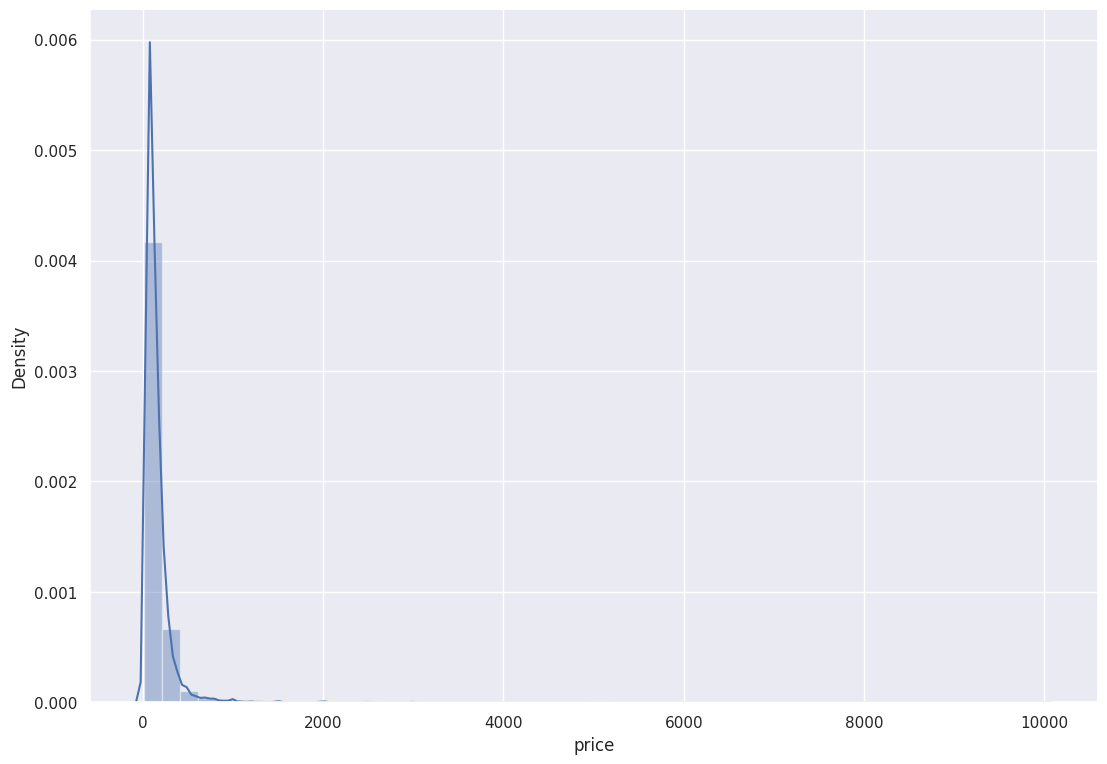

In [ ]:
# check the distribution of price
sns.distplot(df['price'])

* The price column is heavily skewed with most of the price ranging between 10 to 200$.

* There are a very few observations where the minimum nights is very high and thus for those very few observations the price could go high upto 10000$. Hence, they aren't considered as outliers here.

## **<u>Let us find some insights about the Airbnb Hosts in NYC:</u>**

### **How many unique Airbnb hosts are there in NYC?**

In [ ]:
# find unique hosts
df[['host_id']].nunique()

host_id    37455
dtype: int64

* There are 37455 unique Airbnb hosts in New York City.

* It is clear with the count of hosts and properties listed that there are hosts who have multiple properties listed in Airbnb NYC.

### **Who are the hosts with the most multiple property listings in Airbnb NYC?**

The top 10 hosts with the most property listings in NYC are: 
 host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
16098958   Jeremy & Laura        96
12243051   Sonder                96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
Name: host_id, dtype: int64




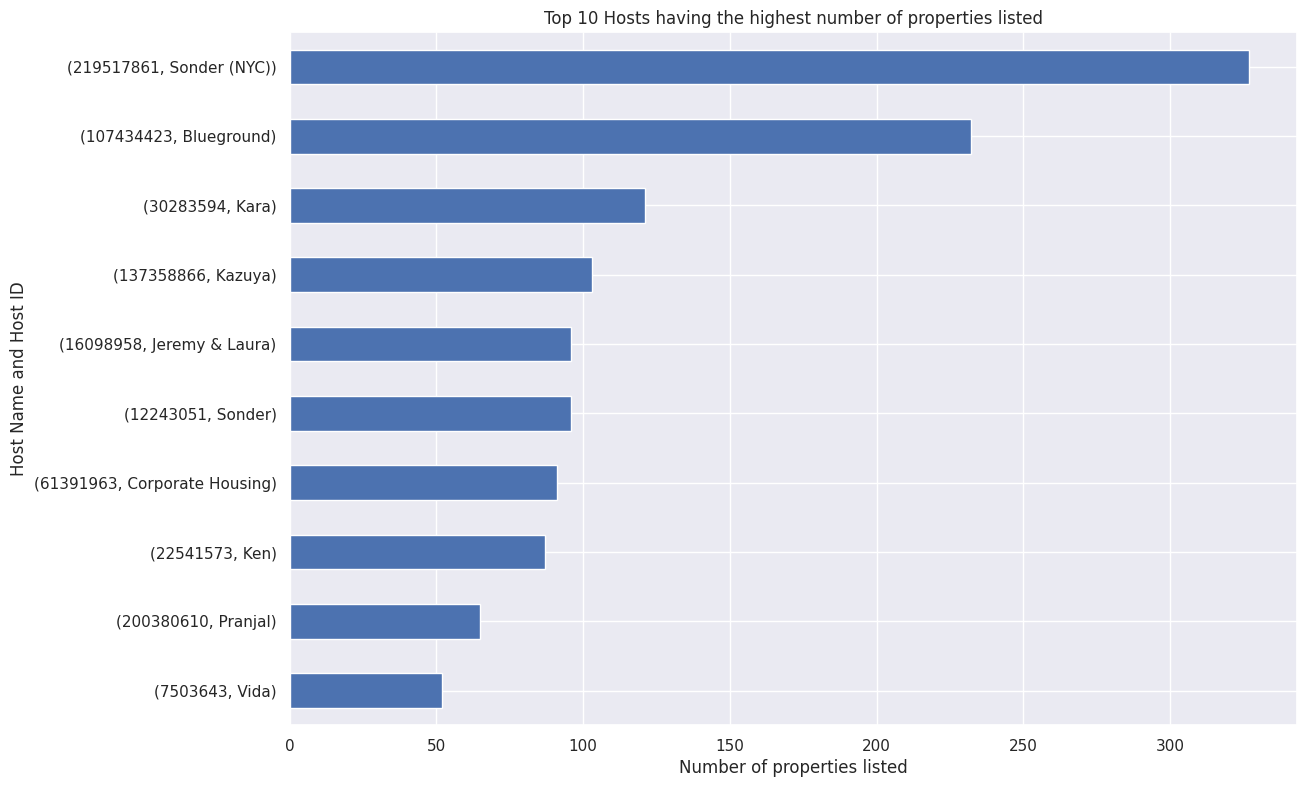

In [ ]:
# top 10 hosts on the basis of count of listings
top_hosts_listings = df.groupby(['host_id','host_name'])['host_id'].count().sort_values(ascending=False)[:10]
print('The top 10 hosts with the most property listings in NYC are: \n', top_hosts_listings)
print('\n')

# plot the top 10 hosts on the basis of count of listings
top_hosts_listings.plot.barh().invert_yaxis()
plt.xlabel('Number of properties listed')
plt.ylabel('Host Name and Host ID')
plt.title('Top 10 Hosts having the highest number of properties listed')
plt.show()

* There are many hosts with more than 100 properties listed in Airbnb NYC.

* We can see from the above plot that Sonder (NYC) has the highest number of properties listed with a total of 327 properties in Airbnb NYC.

We will later check whether his/her properties are the most preferred or not. Does high number of properties means she is receiving the most number of customers?

### **Who are the hosts with the most number of reviews?**

The top 10 hosts who has got the most number of reviews: 
 host_id    host_name                     
37312959   Maya                              2273
344035     Brooklyn&   Breakfast    -Len-    2205
26432133   Danielle                          2017
35524316   Yasu & Akiko                      1971
40176101   Brady                             1818
4734398    Jj                                1798
16677326   Alex And Zeena                    1355
6885157    Randy                             1346
219517861  Sonder (NYC)                      1281
23591164   Angela                            1269
Name: number_of_reviews, dtype: int64




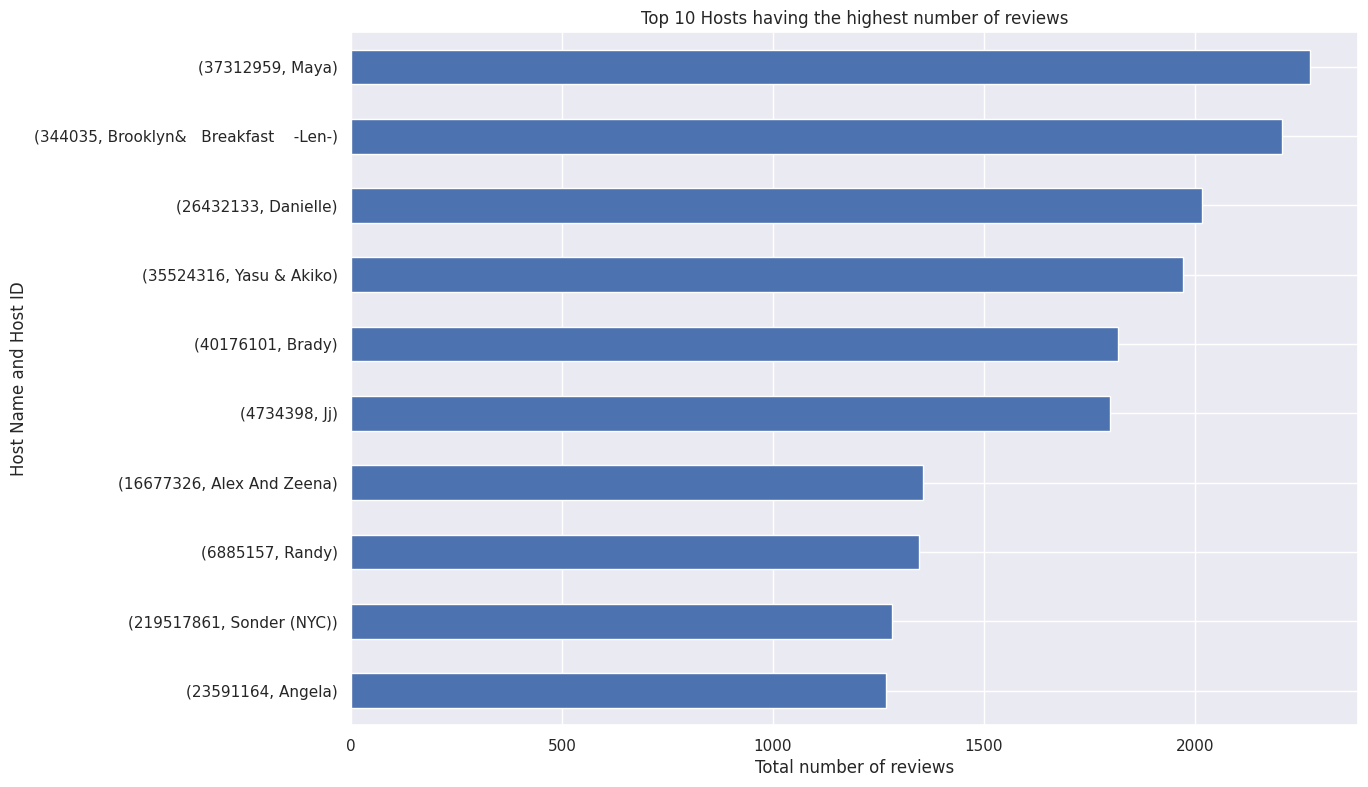

In [ ]:
# top 10 hosts on the basis of reviews
top_hosts_reviews = df.groupby(['host_id','host_name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]
print('The top 10 hosts who has got the most number of reviews: \n',top_hosts_reviews)
print('\n')

# plot the top 10 hosts on the basis of reviews
top_hosts_reviews.plot.barh().invert_yaxis()
plt.ylabel('Host Name and Host ID')
plt.xlabel('Total number of reviews')
plt.title('Top 10 Hosts having the highest number of reviews')
plt.show()

**From this plot**,
* We can clearly see that Sonder (NYC) is not the top host who has received the most number of reviews.

* Thus Sonder (NYC) might have the most properties listed but isn't the most busiest host or a host receiving the most number of customers as per the information we get from the total number of reviews.

**More number of reviews means more number of customers assuming one customer has reviewed a property only once.**

* Host Maya is clearly the winner here who has received a total of 2273 reviews.
* As host Maya receives the most number of reviews we can infer that she gets the most number of customers.

**Hence host Maya looks to be the busiest of all**.

### **Which hosts has got the highest average reviews per month?**

The top 10 hosts who has got the highest reviews per month in average: 
 host_id    host_name
228415932  Louann       20.940000
156684502  Nalicia      18.126667
217379941  Brent        15.780000
47621202   Dona         13.990000
26432133   Danielle     13.604000
256290334  Aisling      13.420000
257832461  Stephanie    13.330000
111841534  Malini       13.150000
27287203   Ben          13.130000
222098649  Melissa      13.110000
Name: reviews_per_month, dtype: float64




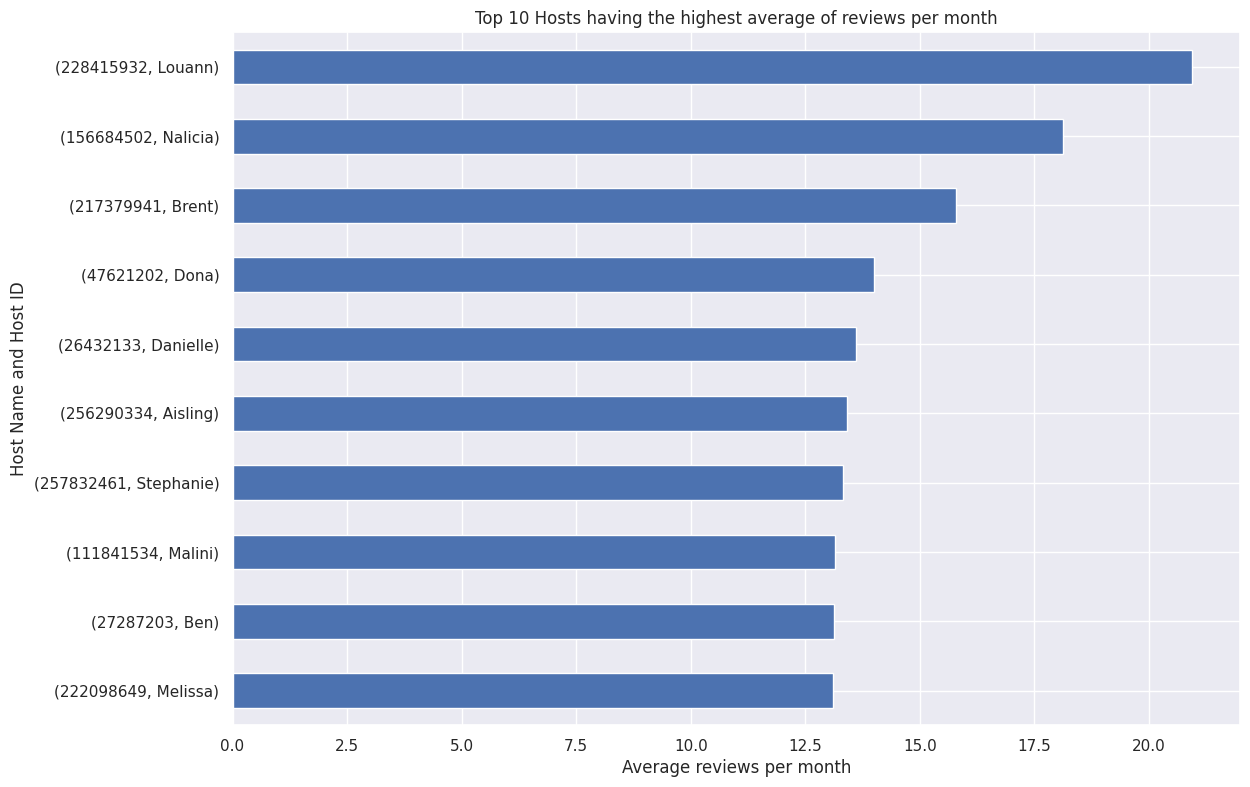

In [ ]:
# top 10 hosts on the basis of reviews per month
top_10_monthly_reviews_hosts = df.groupby(['host_id','host_name'])['reviews_per_month'].mean().sort_values(ascending=False)[:10]
print('The top 10 hosts who has got the highest reviews per month in average: \n',top_10_monthly_reviews_hosts)
print('\n')

# plot the top 10 hosts on the basis of reviews per month
top_10_monthly_reviews_hosts.plot.barh().invert_yaxis()
plt.ylabel('Host Name and Host ID')
plt.xlabel('Average reviews per month')
plt.title('Top 10 Hosts having the highest average of reviews per month')
plt.show()

* The plot above shows that Louann receives 20.94 reviews approximately every month which stands out to be the highest among all other hosts in NYC.
* We can infer from this that Louann receives more number of customers per property in a month. As Louann isn't the host with the most listings or most number of reviews she might have very few number of properties listed.

* Host Maya is nowhere in the top 10 hosts according to average reviews per month and the reason for this might be that she has more number of properties as compared to these top 10 hosts and she might not be receiving a healthy reviews per month for each of her property and as a case her average reviews per month might have dropped below these top 10 hosts.

As we know host Maya is the one receiving the most number of customers, let us check what could be the reason for it.

In [ ]:
# let us check the property details of Host Maya
df[(df['host_name'] == 'Maya') & (df['host_id'] == 37312959)]

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9323,37312959,Maya,Queens,East Elmhurst,40.77005,-73.87691,Private room,45,1,448,9.63,5,166
10623,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
13612,37312959,Maya,Queens,East Elmhurst,40.77026,-73.87561,Private room,45,1,459,10.72,5,175
14699,37312959,Maya,Queens,East Elmhurst,40.77107,-73.87559,Private room,45,1,412,10.19,5,159
18045,37312959,Maya,Queens,East Elmhurst,40.77009,-73.87708,Private room,32,1,411,11.40,5,161


* From the dataframe above we can see that Host Maya has five properties listed in the same neighborhood and the reason for having the most customers could be

  * price: which is very reasonable as compared to many others
  * min nights: condition for minimum nights to stay is only 1 which is way less than others. People coming for short trips will prefer her property to stay.
  * availability: quite a healthy number of days she is available
  * reviews: number of reviews is very high which will help customers in deciding to book her property

* Host Maya even has got a good average reviews per month (10.7) which is slightly below than the top 10 hosts on the basis of average reviews per month.

**We can conclude that host Maya is the busiest host in NYC and there are multiple reasons for it.**

### **Which hosts are more occupied or less available out of 365 days?**

In [ ]:
# top 10 hosts on the basis of least availability
occupied_hosts = df.groupby(['host_id','host_name'])['availability_365'].mean().sort_values(ascending=True)
print('Name and Id of the hosts on the basis of availability: \n',occupied_hosts)

Name and Id of the hosts on the basis of availability: 
 host_id    host_name       
2438       Tasos                 0.0
10264372   Tyrell                0.0
10264377   Anthony               0.0
41757762   Sara                  0.0
41743945   George - Francis      0.0
                               ...  
17550546   Genevieve           365.0
198328249  Hiram               365.0
88827816   Ziva                365.0
223248121  Julia               365.0
24954668   Sophie              365.0
Name: availability_365, Length: 37455, dtype: float64


* We can see that there are few hosts who aren't even available for a day.

* Tasos, Tyrell, Anthony are a few to name and it is clear that reviews aren't related to availability as we can see that there are hosts with not the most reviews being occupied the whole year.

* Thus we can infer that few hosts might get less customers but those few customers are staying for a longer period of time making the properties occupied.

## **<u>Now, let us check some insights about the Neighbourhood groups and Neighbourhoods in NYC:</u>**

### **Which neighbourhood group has the most number of properties listed?**

The top neighbourhood groups which has the most number of properties listed: 
 Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64




ValueError: could not convert string to float: 'Brooklyn'

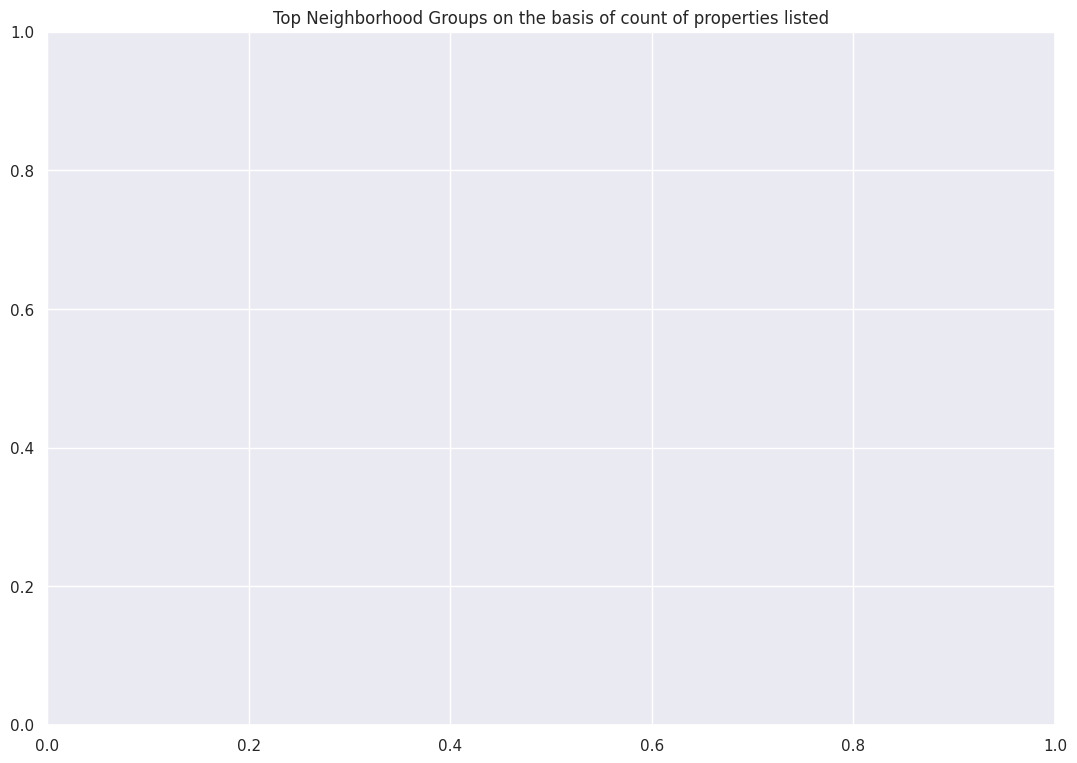

In [ ]:
# top neighbourhood groups on the basis of count of properties
top_neighbourhood_groups = df['neighbourhood_group'].value_counts()
print('The top neighbourhood groups which has the most number of properties listed: \n',top_neighbourhood_groups)
print('\n')

# plot the top neighbourhood groups with the count of properties
plt.title('Top Neighborhood Groups on the basis of count of properties listed')
sns.countplot(df['neighbourhood_group'])
plt.show()

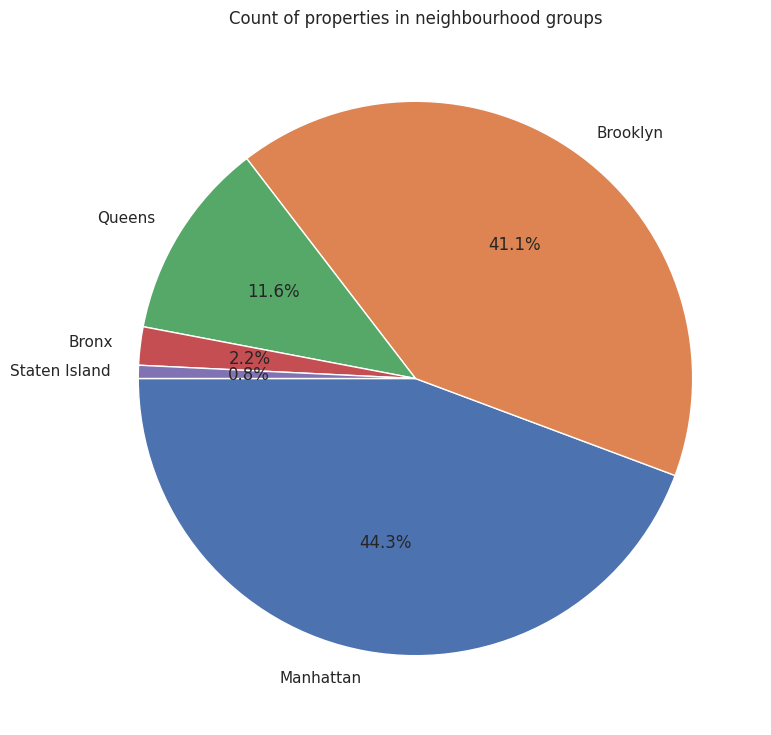

In [ ]:
# visualizing the neighbourhood group through a pie chart
plt.figure()
plt.title('Count of properties in neighbourhood groups')
plt.pie(df['neighbourhood_group'].value_counts(), labels=df['neighbourhood_group'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

* We can see that Manhattan (21660) and Brooklyn (20095) Neighbourhood Group has the most number of properties listed in Airbnb NYC according to the above plots.

* Staten Island (373) has the least number of properties listed in Airbnb NYC.

### **Which neighbourhood group in NYC is the most expensive and the most affordable?**

The neighbourhood groups along with its average cost per day: 
 neighbourhood_group
Manhattan        196.884903
Brooklyn         124.438915
Staten Island    114.812332
Queens            99.517649
Bronx             87.577064
Name: price, dtype: float64




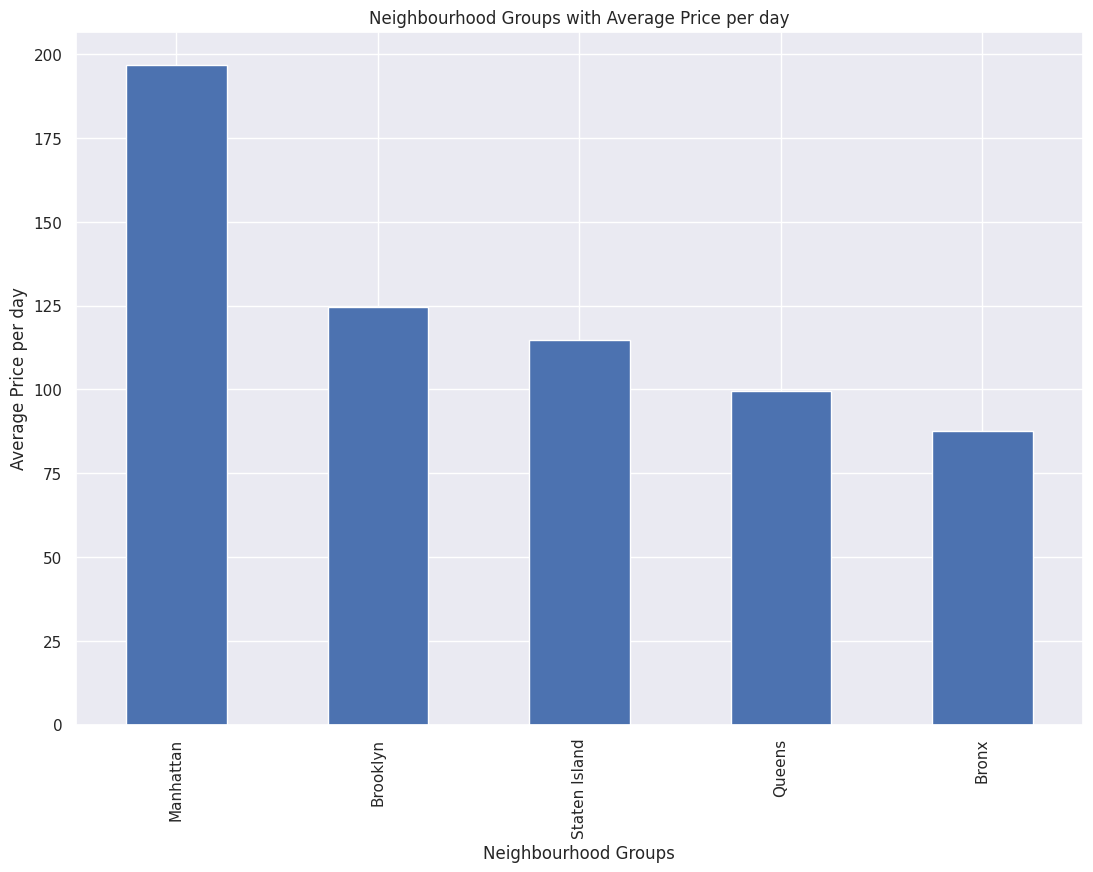

In [ ]:
# top neighbourhood groups with higher average prices per day
price_neighbourhood_groups = df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)
print('The neighbourhood groups along with its average cost per day: \n',price_neighbourhood_groups)
print('\n')

# plot the higher priced neighbourhood groups
price_neighbourhood_groups.plot.bar()
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price per day')
plt.title('Neighbourhood Groups with Average Price per day')
plt.show()

* The plot shows Manhattan (196.88) is the most expensive neighborhood group in NYC and Bronx (87.57) is the least expensive.

### **What are the different room types available in different neighbourhood groups?**

In [ ]:
# room types in different neighbourhood groups
room_type_neighbourhood_groups = df.groupby(['neighbourhood_group','room_type'])['room_type'].count()
print('The different room types available in different neighbourhood groups: \n',room_type_neighbourhood_groups)
print('\n')



The different room types available in different neighbourhood groups: 
 neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         651
                     Shared room           60
Brooklyn             Entire home/apt     9558
                     Private room       10126
                     Shared room          411
Manhattan            Entire home/apt    13198
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64




**We can see from the above graph that,**
* Brooklyn has almost similar numbers of Private Rooms (10126) and Entire Homes/Apt (9558).
* Manhattan has got the highest number of Entire Homes/Apt (13198) and there are very few shared rooms available in all the neighbourhood groups in comparison to other room types.
* Bronx and Staten Island has got very fewer rooms than the other neighbourhood groups.

* Due to the availability of rooms in Brooklyn and Manhattan people will tend to prefer to stay in these two neighborhood groups as compared to others.

### **What are the average prices of different room types in different neighbourhood groups?**

neighbourhood_group  room_type      
Manhattan            Entire home/apt    249.257994
Brooklyn             Entire home/apt    178.346202
Staten Island        Entire home/apt    173.846591
Queens               Entire home/apt    147.050573
Bronx                Entire home/apt    127.506596
Manhattan            Private room       116.776622
                     Shared room         88.977083
Brooklyn             Private room        76.545428
Queens               Private room        71.762456
                     Shared room         69.020202
Bronx                Private room        66.890937
Staten Island        Private room        62.292553
Bronx                Shared room         59.800000
Staten Island        Shared room         57.444444
Brooklyn             Shared room         50.773723
Name: price, dtype: float64


<Axes: xlabel='neighbourhood', ylabel='price'>

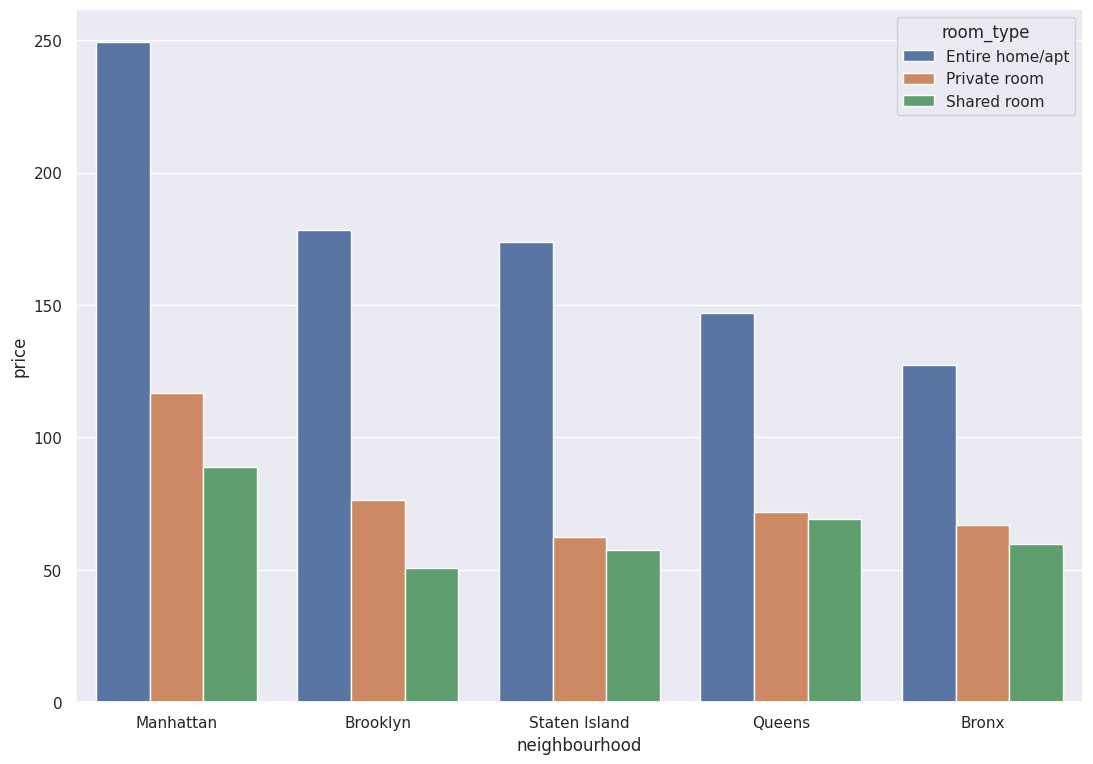

In [ ]:
# price of different room types in different neighbourhood groups
price_neighbourhoods = df.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending=False)
print(price_neighbourhoods)

# convert it into a dataframe and plot
price_df = pd.DataFrame(price_neighbourhoods)
price_df = price_df.rename_axis(['neighbourhood','room_type']).reset_index()
sns.barplot(x='neighbourhood', y='price', hue='room_type', data=price_df)

* The Entire Home/Apt category is the costliest across all the neighbourhood groups.
* As we have seen earlier, Manhattan is the expensive neighbourhood group across all room types available.
* The average price of Private room in Staten Island is the least expensive as compared to others. We didn't get this insight by looking at the average price per day in Staten Island as the average price per day in Staten Island was higher than Queens and Bronx.
* Brooklyn which is an expensive neighbourhood to stay has the least average price per day for Shared rooms.

### **What are the total number of reviews of different room types in different neighbourhood groups?**

neighbourhood_group  room_type      
Brooklyn             Entire home/apt    267125
Manhattan            Entire home/apt    235147
Brooklyn             Private room       213341
Manhattan            Private room       209150
Queens               Private room        93561
                     Entire home/apt     60644
Bronx                Private room        16257
                     Entire home/apt     11627
Manhattan            Shared room         10272
Staten Island        Entire home/apt      5857
Brooklyn             Shared room          5786
Staten Island        Private room         5670
Queens               Shared room          2745
Bronx                Shared room           432
Staten Island        Shared room            14
Name: number_of_reviews, dtype: int64


<Axes: xlabel='neighbourhood', ylabel='number_of_reviews'>

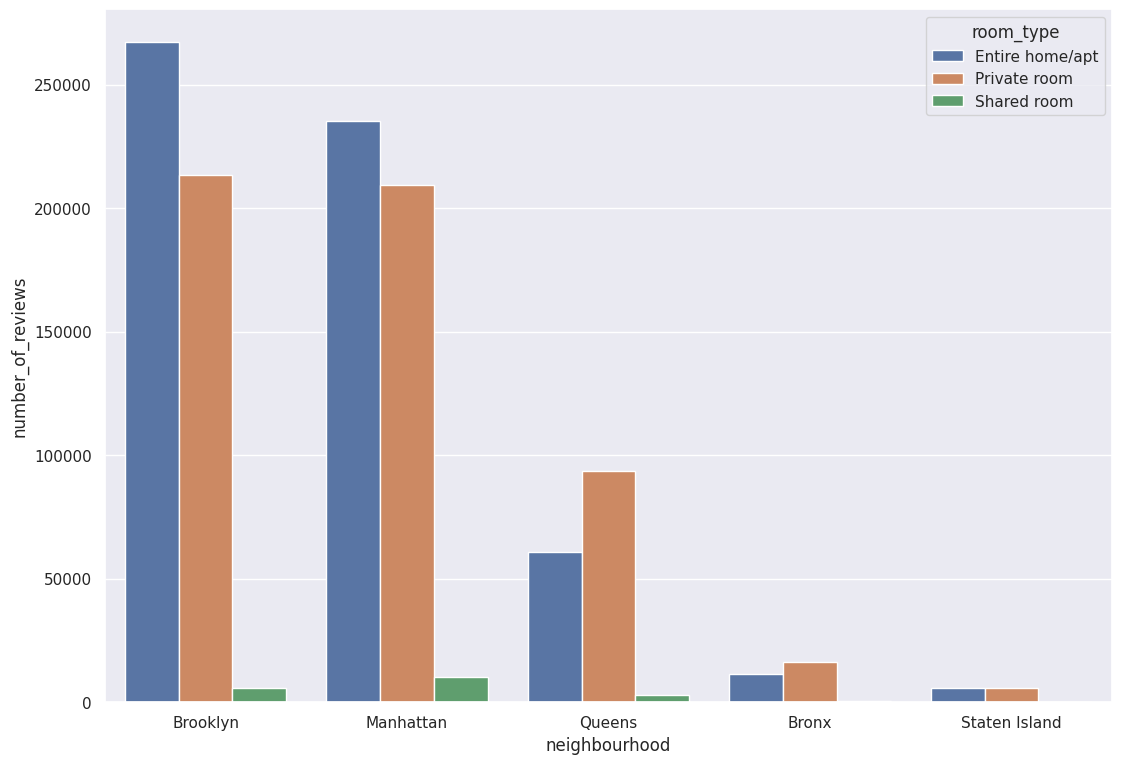

In [ ]:
# number of reviews of room types in different neighbourhood groups
reviews_neighbourhoods = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().sort_values(ascending=False)
print(reviews_neighbourhoods)

# convert it into a dataframe and plot
review_df = pd.DataFrame(reviews_neighbourhoods)
review_df = review_df.rename_axis(['neighbourhood','room_type']).reset_index()
sns.barplot(x='neighbourhood', y='number_of_reviews', hue='room_type', data=review_df)

* Staten Island receives the least number of reviews for Private Rooms and Entire Homes/Apt. This could be due to the reason that Staten Island is mostly comprised of residential areas and has the least number of Airbnb properties listed.

* As an overall neighbourhood group Brooklyn receives the most number of reviews in total for Entire Home/Apt and Private Rooms and Manhattan receives the most number of reviews in total for Shared Rooms.

* People don't prefer to stay in Shared rooms which is pretty obvious from the plot above.

* Manhattan and Brooklyn being the most popular areas for tourists, receives more traffic as compared to others and hence the total number of reviews are higher.


### **What is the average availability of different room types in different neighbourhood groups?**

neighbourhood_group  room_type      
Staten Island        Private room       226.361702
Queens               Shared room        192.186869
Staten Island        Entire home/apt    178.073864
Brooklyn             Shared room        177.725061
Bronx                Private room       171.399386
                     Entire home/apt    158.000000
                     Shared room        154.216667
Queens               Private room       149.222716
Manhattan            Shared room        138.572917
Queens               Entire home/apt    132.267176
Manhattan            Entire home/apt    117.149871
                     Private room       101.845026
Brooklyn             Private room        99.912206
                     Entire home/apt     97.207679
Staten Island        Shared room         64.777778
Name: availability_365, dtype: float64


<Axes: xlabel='neighbourhood', ylabel='availability_365'>

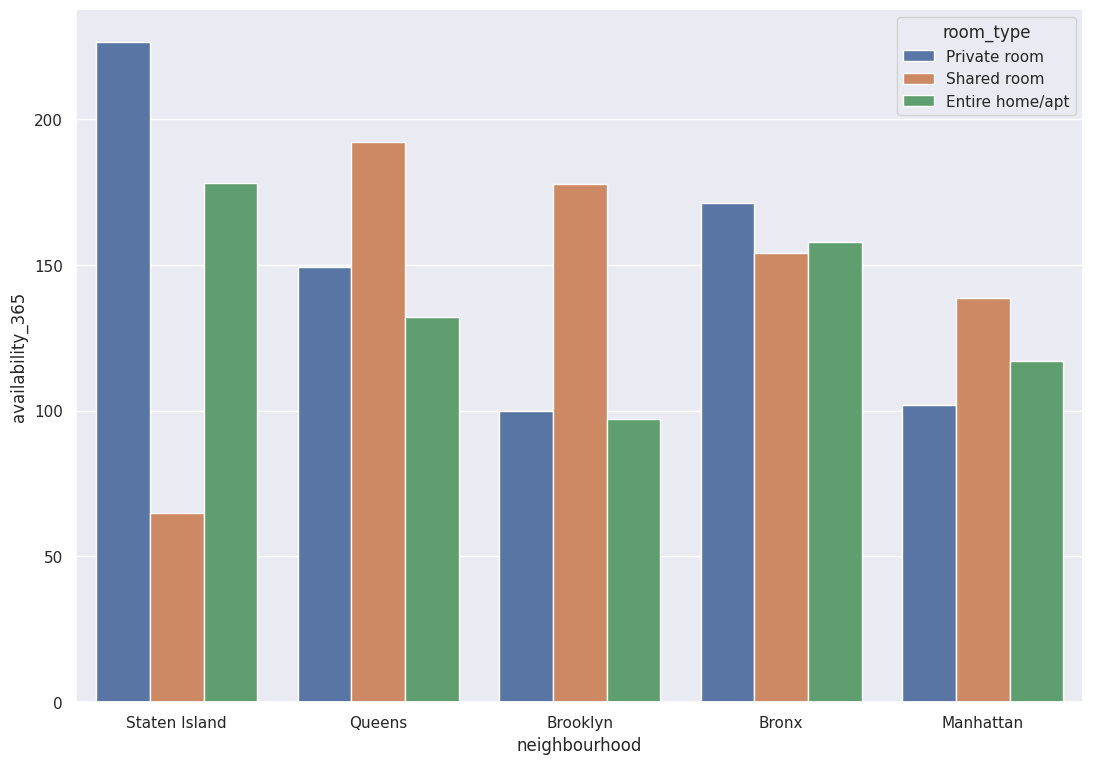

In [ ]:
# availability of different room types in different neighbourhoods
available_neighbourhoods = df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().sort_values(ascending=False)
print(available_neighbourhoods)

# convert it into a dataframe and plot
aval_df = pd.DataFrame(available_neighbourhoods)
aval_df = aval_df.rename_axis(['neighbourhood','room_type']).reset_index()
sns.barplot(x='neighbourhood', y='availability_365', hue='room_type', data=aval_df)

* Private rooms in Staten Island are the most available and is the least expensive, hence it could be a natural choice for people seeking low cost accommodations.

* Manhattan and Brooklyn has the least availability of Private rooms and Entire homes, and it is very natural as most of the tourist attractions are nearby Manhattan, thus more people visiting these Airbnbs in Manhattan.

* Manhattan and Brooklyn receives the most traffic and hence it is obvious that these two neighbourhood groups will have the least availability of properties.

### **Which neighbourhood group people prefer to spend more nights in or prefers a long stay?**

The neighbourhood groups with the average minimum nights: 
 neighbourhood_group
Manhattan        8.579409
Brooklyn         6.055486
Queens           5.181433
Staten Island    4.831099
Bronx            4.563303
Name: minimum_nights, dtype: float64




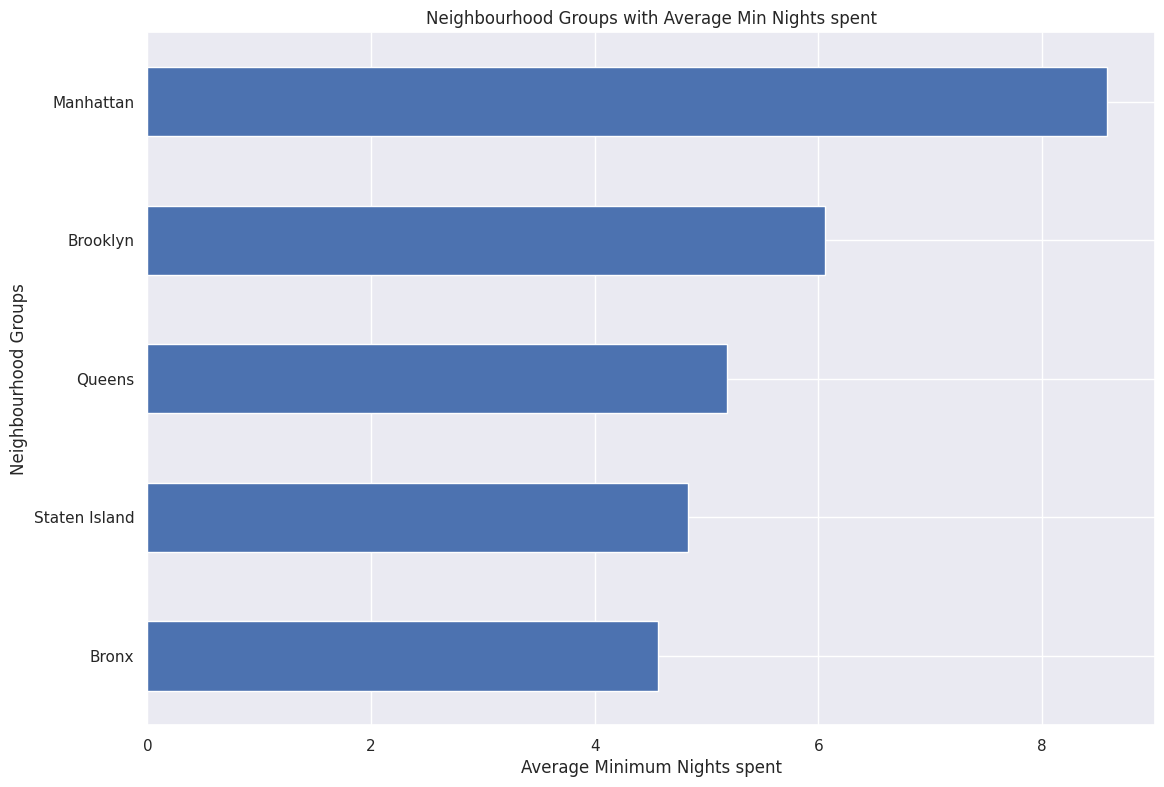

In [ ]:
# minimum nights spent in different neighbourhood groups
min_nights_neighbourhood_group = df.groupby(['neighbourhood_group'])['minimum_nights'].mean().sort_values(ascending=False)
print('The neighbourhood groups with the average minimum nights: \n',min_nights_neighbourhood_group)
print('\n')

# plot the minimum nights spent w.r.t neighbourhood groups
min_nights_neighbourhood_group.plot.barh().invert_yaxis()
plt.xlabel('Average Minimum Nights spent')
plt.ylabel('Neighbourhood Groups')
plt.title('Neighbourhood Groups with Average Min Nights spent')
plt.show()

* Most people prefer to spend more nights in Manhattan (8.5) and the least amount of nights in Bronx (4.5) on an average.
* Due to more number of properties listed and tourist attractions in Manhattan and Brooklyn, people prefer spending more number of nights in these two neighbourhood groups.

### **Which neighbourhood group has got the most number of reviews?**

The neighbourhood groups with total number of reviews: 
 neighbourhood_group
Brooklyn         486252
Manhattan        454569
Queens           156950
Bronx             28316
Staten Island     11541
Name: number_of_reviews, dtype: int64




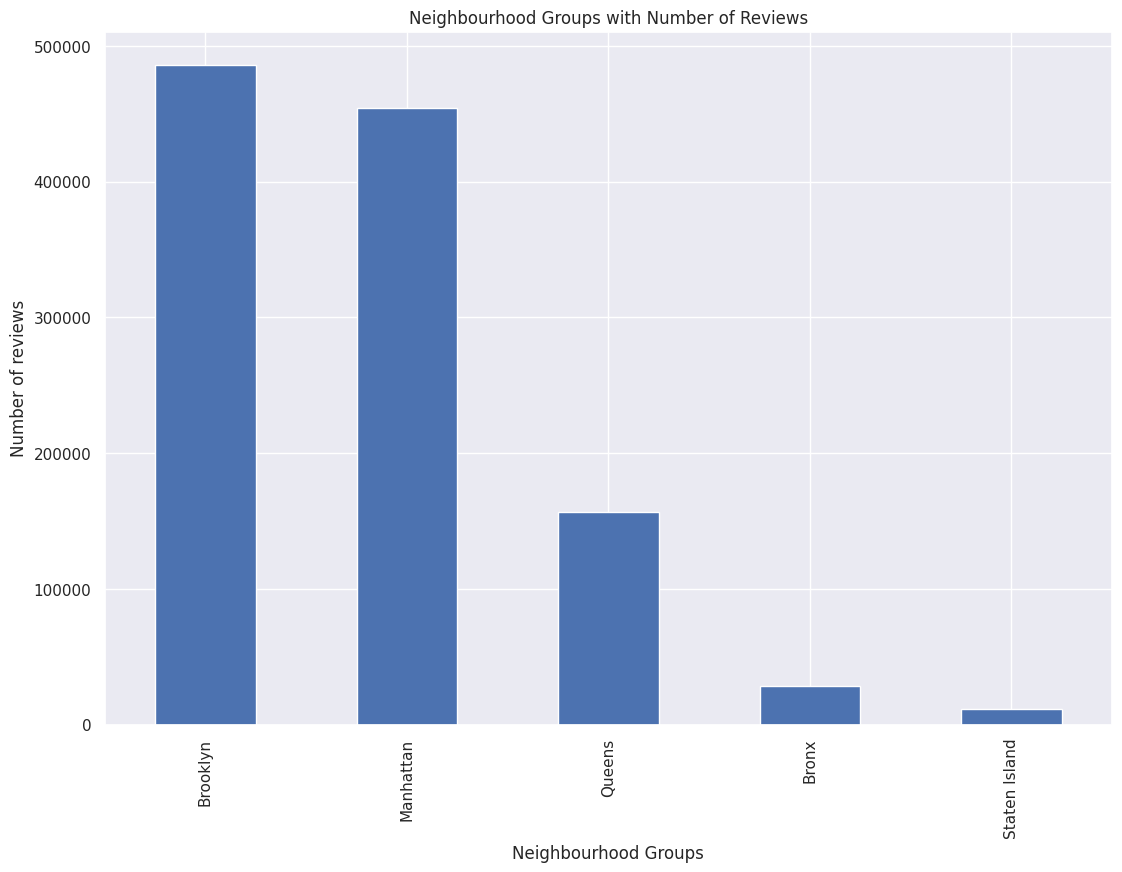

In [ ]:
# top neighbourhood groups on the basis of number of reviews
top_reviews_neighbourhood_group = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().sort_values(ascending=False)
print('The neighbourhood groups with total number of reviews: \n',top_reviews_neighbourhood_group)
print('\n')

# plot the neighbourhood groups on the basis of number of reviews
top_reviews_neighbourhood_group.plot.bar()
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of reviews')
plt.title('Neighbourhood Groups with Number of Reviews')
plt.show()

* Brooklyn has got the most number of reviews where the number of properties listed isn't the highest. More number of reviews means more number of customers and hence, Brooklyn could be receiving more visitors as compared to others.

* Manhattan with the most properties listed has the second highest number of reviews which is very close to Brooklyn in terms of traffic. We can infer from the above insight of minimum nights and this that a good number of people visit Manhattan airbnbs and prefers to stay for a longer time as compared to other neighbourhood groups.

* Brooklyn and Manhattan receive way more traffic than any other neighbourhood groups and it is natural as these areas have a lot of tourist attractions, vibrant night-life etc and it perfectly makes sense that the prices are high in these areas.

* Bronx and Staten Island has a very few properties listed and is mostly a residential area and thus very less number of people visiting these areas.

### **Which neighbourhood group has the most availability out of 365 days a year?**

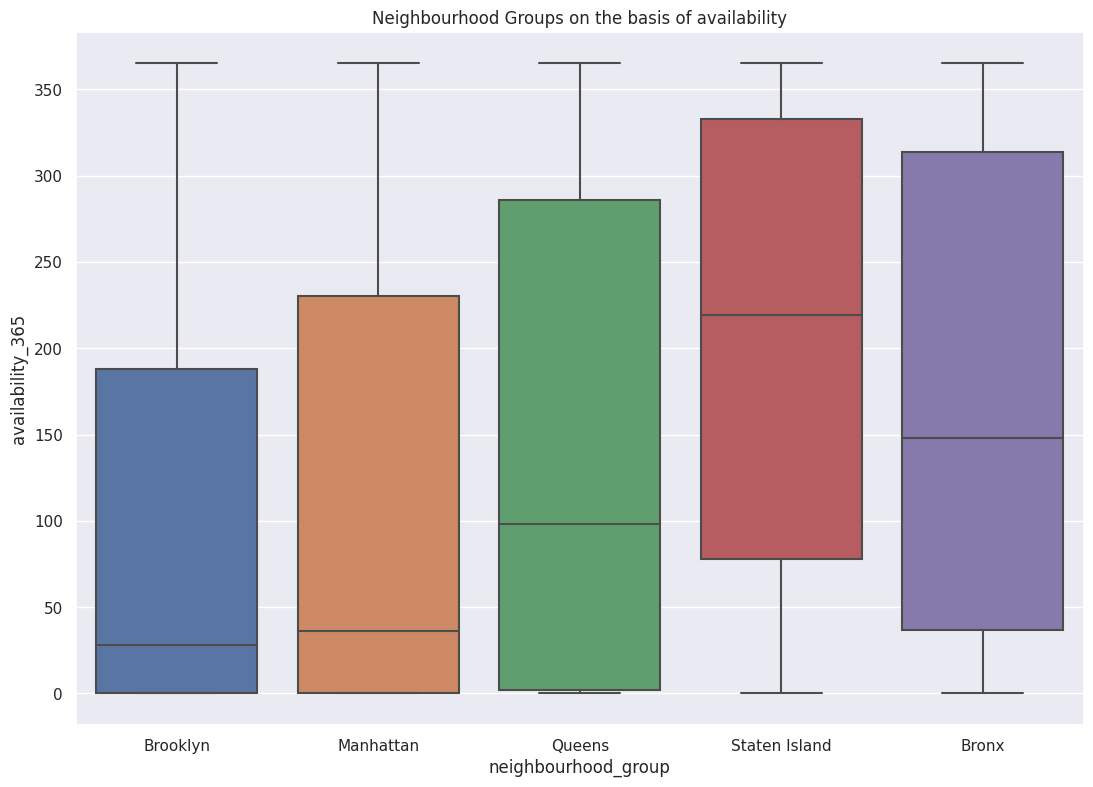

In [ ]:
# top neighbourhood groups on the basis of availability
plt.figure()
plt.title('Neighbourhood Groups on the basis of availability')
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365')
plt.show()

Text(0.5, 1.0, 'Neighbourhood Groups on the basis of availability')

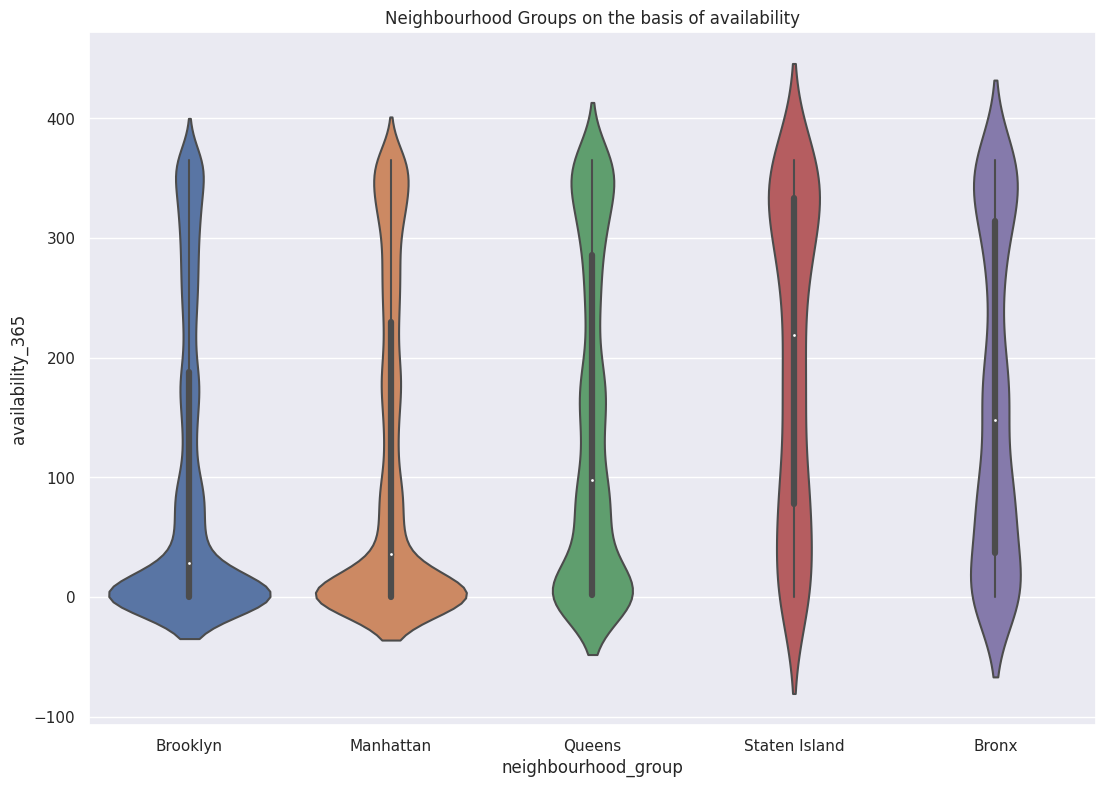

In [ ]:
# visualizing the availability in different neighbourhood groups through a violin plot
sns.violinplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title('Neighbourhood Groups on the basis of availability')

* The box plot above shows that Staten Island has the most available properties to book out of 365 days and Brooklyn has the least available properties.

* The violin plot shows in which range most of the properties lie in terms of availability in each neighbourhood group.

  * Most of the properties in Brooklyn and Manhattan are available for lesser number of days i.e, 0 to 60 days or so. The values for available days lie near the minimum.
  * Most of the properties in Queens and Bronx are available for 0 to 100 and 300 to 360 days or so. The values for available days lie near the minimum and the maximum.
  * Properties in Staten Island lie between the whole range of 0 to 365 days in terms of availability. There is a slight probability increase of values lying near the maximum.

## **<u>Let us have a look of the different features over the map of NYC:</u>**

### **Locations/Map of Neighbourhood Groups**

Text(0.5, 1.0, 'Locations of different neighbourhood groups in NYC over a map')

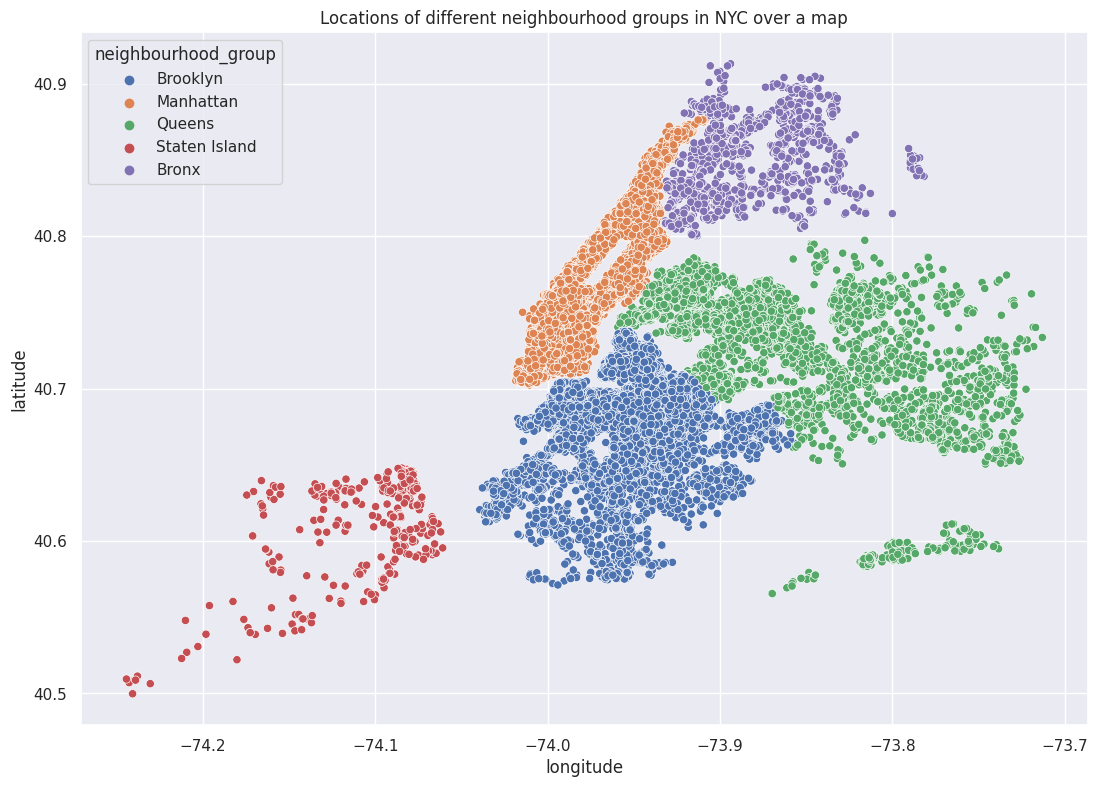

In [ ]:
# plot neighbourhood groups on the basis of latitude and longitude
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue='neighbourhood_group', data=df)
plt.title('Locations of different neighbourhood groups in NYC over a map')

Compared to a real image of New York City:



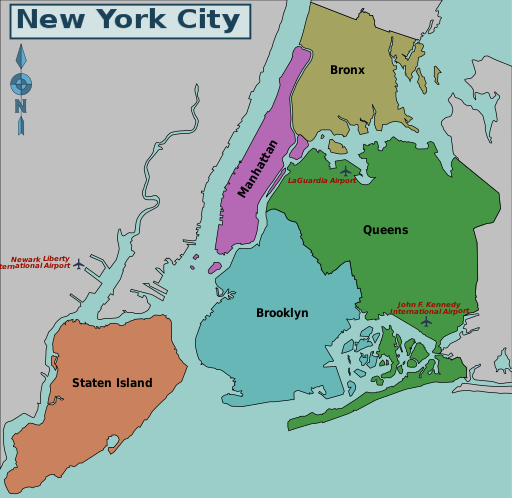

### **Room types per location of neighbourhood groups**

Text(0.5, 1.0, 'Room types in different neighbourhood groups as per location over a map')

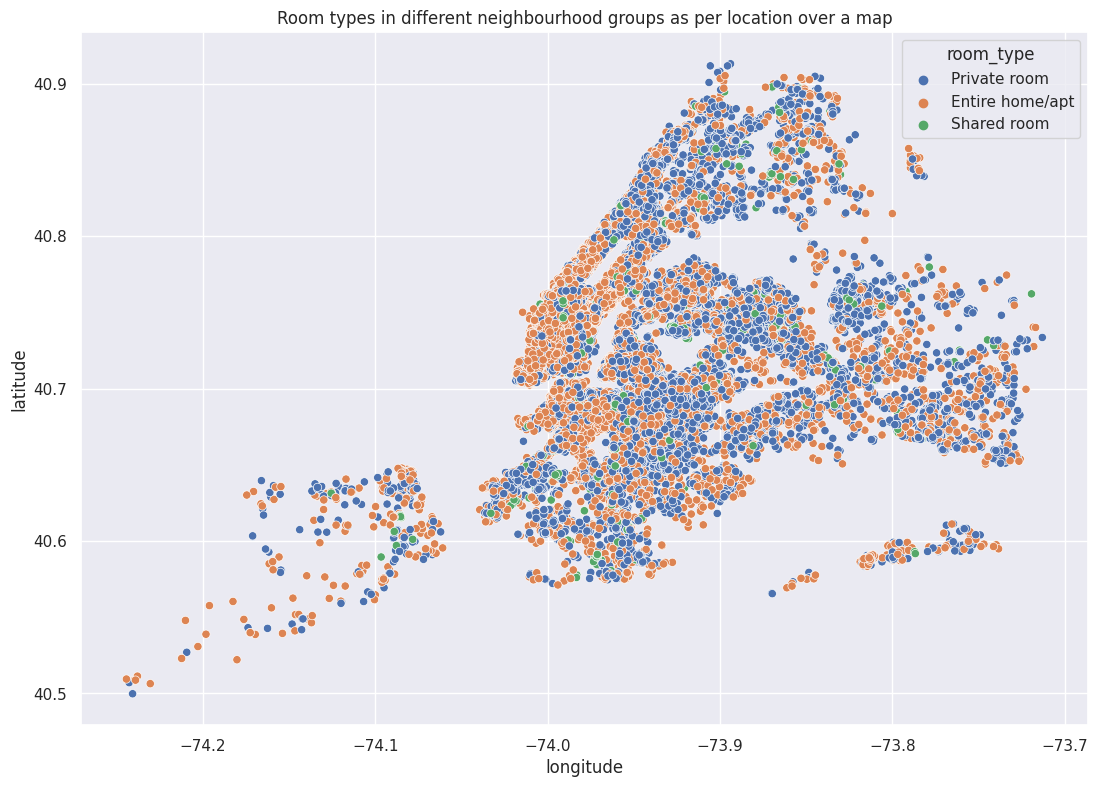

In [ ]:
# plot the room types per location of neighbourhood groups
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue='room_type', data=df)
plt.title('Room types in different neighbourhood groups as per location over a map')

### **Price variation across locations of neighbourhood groups**

Text(0.5, 1.0, 'Price variation across location of different neighbourhood groups')

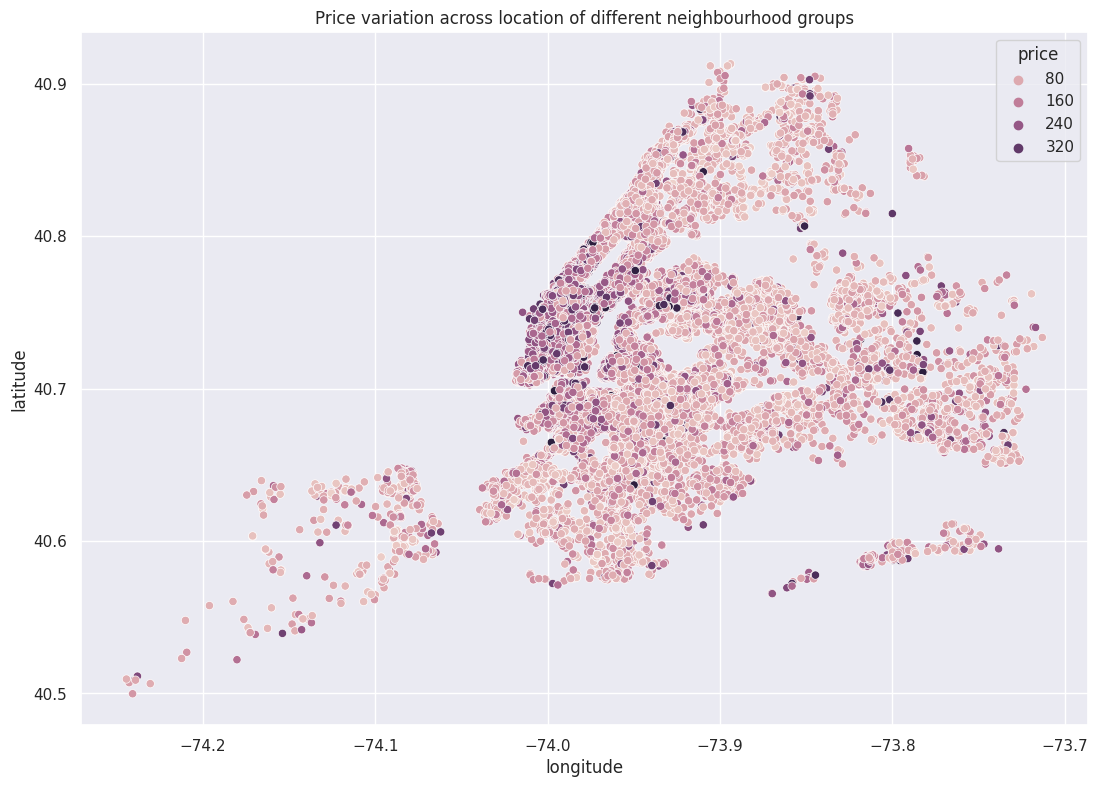

In [ ]:
# plot the price variation across locations
sns.scatterplot(x=df['longitude'],y= df['latitude'], hue='price', data=df[df.price<400])
plt.title('Price variation across location of different neighbourhood groups')

As we had a few properties which are listed at a very higher price, we decided to see the price variation across neighbourhood groups where the listed price is below 400. We can clearly see that most of the properties in Manhattan are costly and ranging near 400 dollars , other than that most of the properties across all neighbourhood groups are below 100 dollars.

### **Availability across different neighbourhood groups**

Text(0.5, 1.0, 'Availability across locations of different neighbourhood groups')

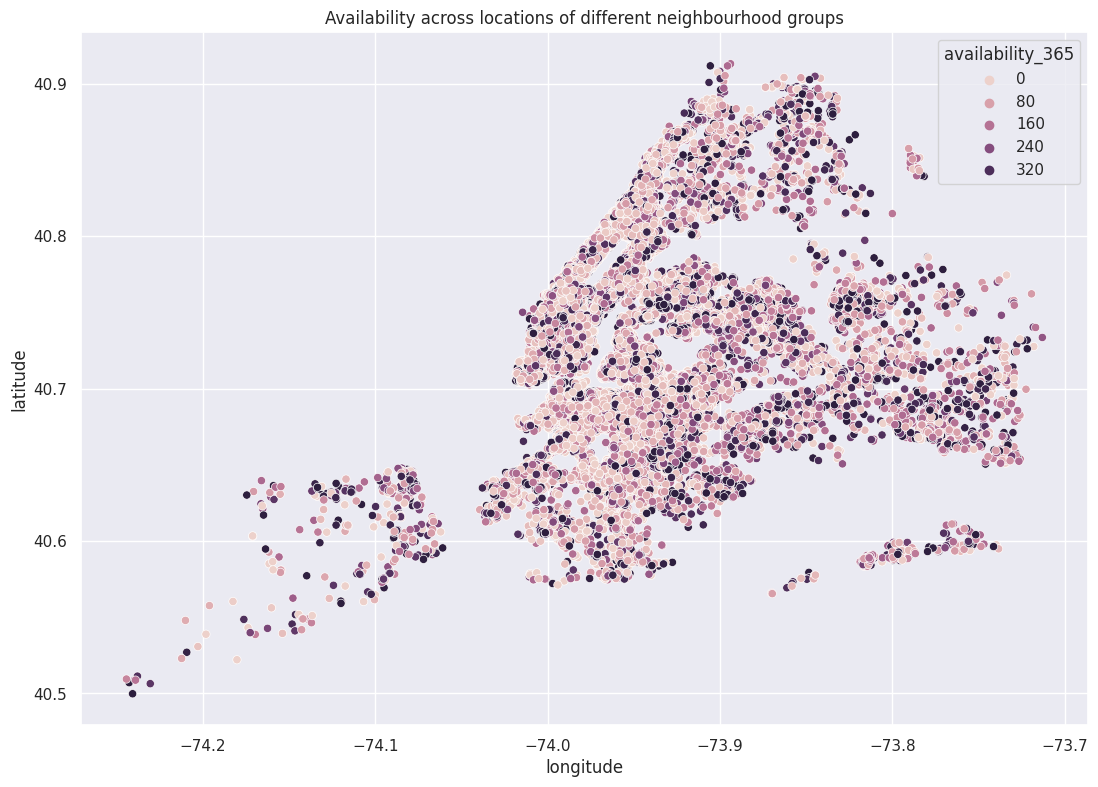

In [ ]:
# plot availability across neighbourhood groups
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue='availability_365', data=df)
plt.title('Availability across locations of different neighbourhood groups')

* Queens and Bronx has more availability out of 365 days a year across NYC.
* Staten Island has many properties which are least available out of 365 days.

### **Which neighbourhoods has the most number of properties listed?**

The top 10 neighbourhoods which has the most number of properties listed: 
 Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64




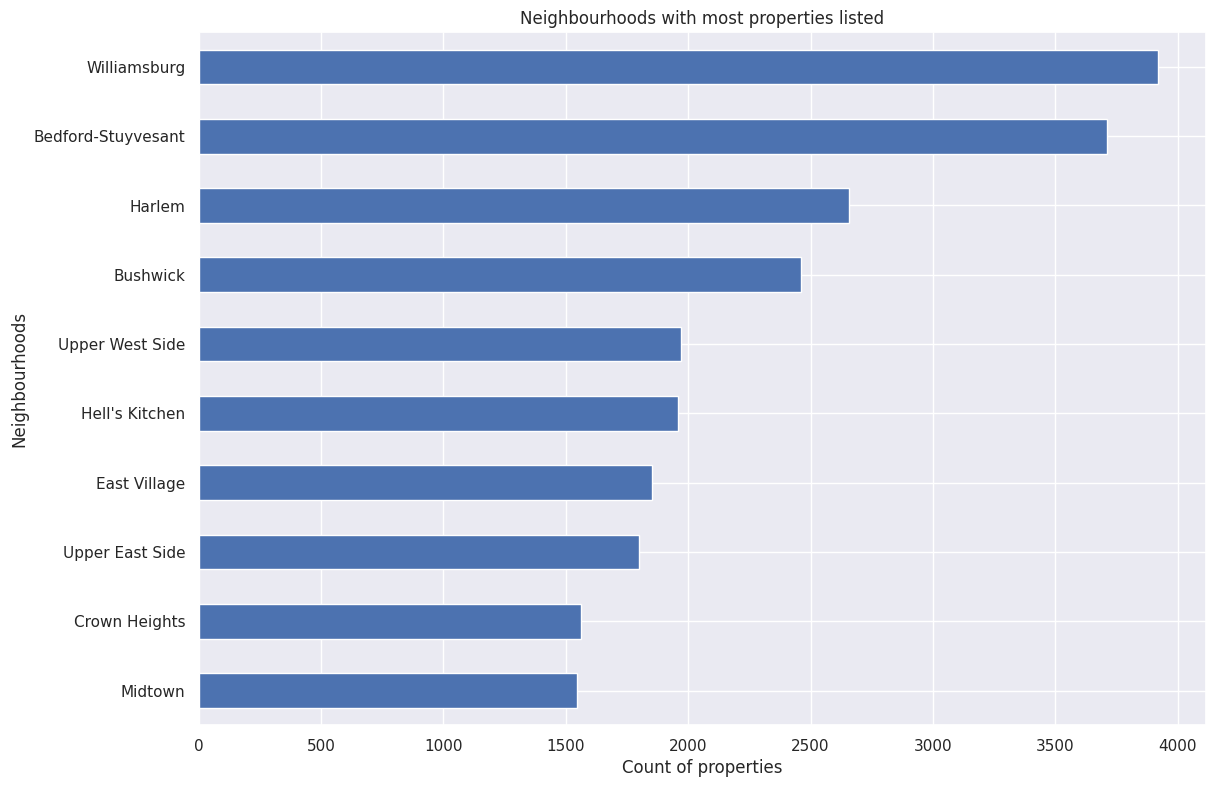

In [ ]:
# top neighbourhoods on the basis of count of properties
top_10_neighbourhoods = df['neighbourhood'].value_counts().sort_values(ascending=False)[:10]
print('The top 10 neighbourhoods which has the most number of properties listed: \n',top_10_neighbourhoods)
print('\n')

# plot the top 10 neighbourhoods
top_10_neighbourhoods.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Count of properties')
plt.title('Neighbourhoods with most properties listed')
plt.show()

* Williamsburg (3919) has the most number of properties listed among all the neighbourhoods.
* Williamsburg is in Brooklyn and we might be feeling that Brooklyn too will have the most number of properties listed among all other neighbourhood groups but this isn't true. We have seen earlier that Manhattan group has the most number of properties listed.

### **Which neighbourhoods are the most expensive and the most affordable?**

The most expensive neighbourhoods: 
 neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64




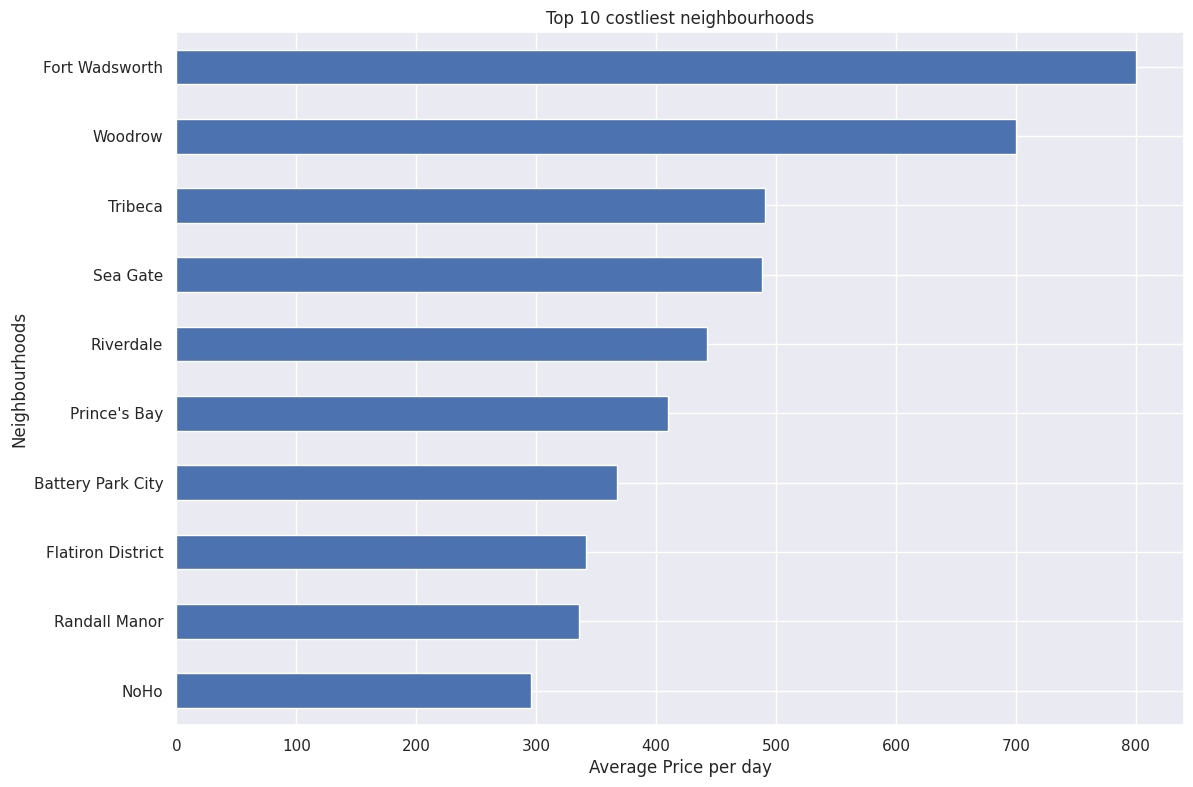

In [ ]:
# find the top 10 costly neighbourhoods in NYC
high_priced_neighbourhoods = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]
print('The most expensive neighbourhoods: \n',high_priced_neighbourhoods)
print('\n')

# plot the costliest neighbourhoods
high_priced_neighbourhoods.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average Price per day')
plt.title('Top 10 costliest neighbourhoods')
plt.show()

The most affordable neighbourhoods: 
 neighbourhood
Bull's Head       47.333333
Hunts Point       50.500000
Tremont           51.545455
Soundview         53.466667
New Dorp          57.000000
Bronxdale         57.105263
New Dorp Beach    57.400000
Grant City        57.666667
Concord           58.192308
Mount Eden        58.500000
Name: price, dtype: float64




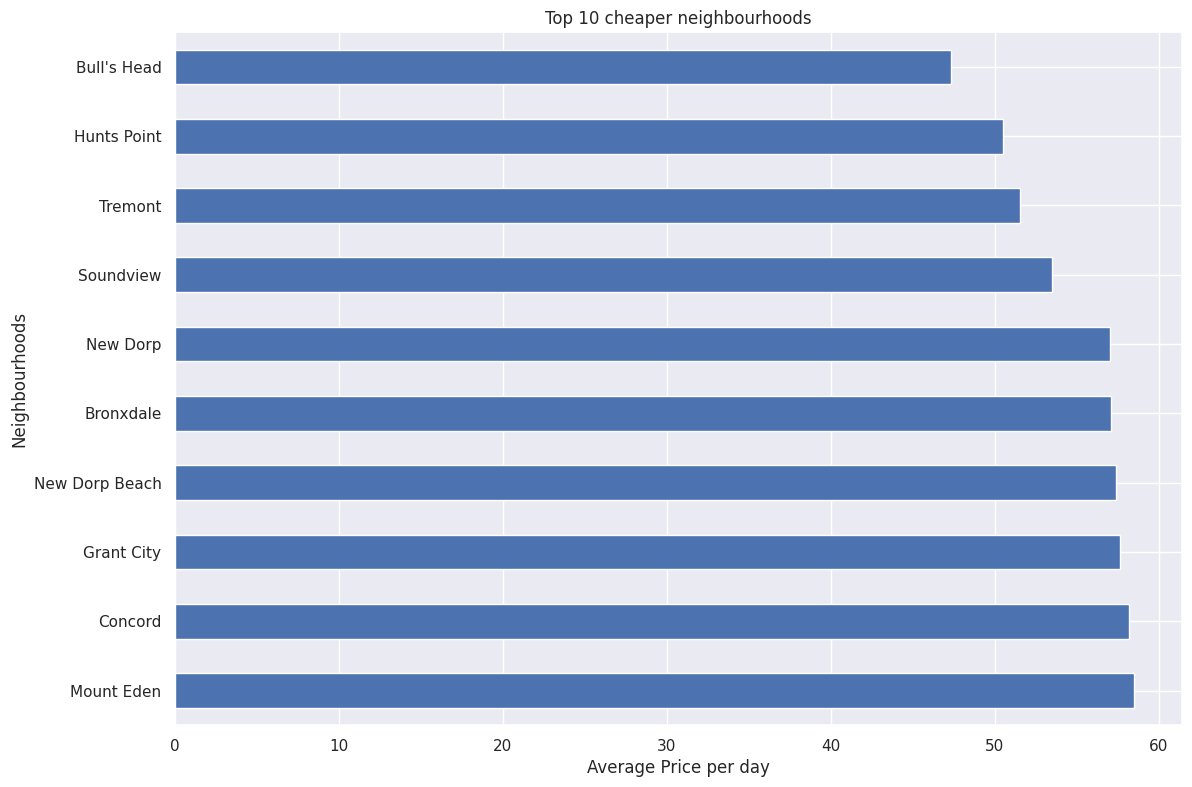

In [ ]:
# find the top 10 cheaper neighbourhoods in NYC
low_priced_neighbourhoods = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10]
print('The most affordable neighbourhoods: \n',low_priced_neighbourhoods)
print('\n')

# plot the cheaper neighbourhoods
low_priced_neighbourhoods.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average Price per day')
plt.title('Top 10 cheaper neighbourhoods')
plt.show()

* Fort Wadsworth (800) is the costliest neighbourhood and Bull's Head (47.3) is the cheapest neighbourhood.

* Interestingly, both of the neighbourhoods lie in the Staten Island group which does not happen to be the costliest or the cheapest neighbourhood group in total.

* Thus Staten Island has a variety of properties which includes some expensive ones and some affordable ones too.

### **Which neighbourhood is more preferred for longer stays or more nights?**

The neighbourhoods preferred for longer stays: 
 neighbourhood
Spuyten Duyvil                48.250000
North Riverdale               41.400000
Battery Park City             30.328571
Olinville                     23.500000
Vinegar Hill                  18.352941
Bay Terrace, Staten Island    16.500000
Mount Hope                    15.950000
Greenwich Village             15.839286
Murray Hill                   15.615702
Claremont Village             15.214286
Name: minimum_nights, dtype: float64




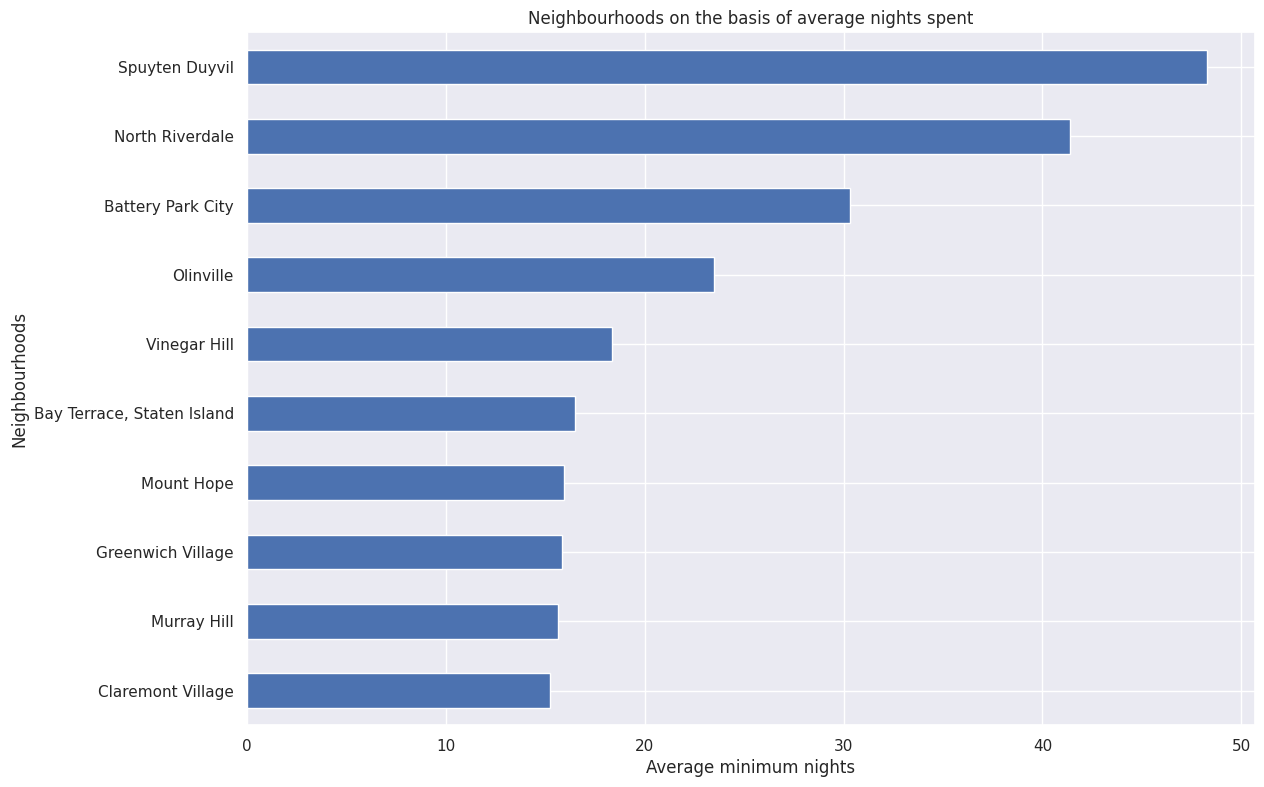

In [ ]:
# top 10 neighbourhoods on the basis of average min nights
top_10_neighbourhoods_min_nights = df.groupby(['neighbourhood'])['minimum_nights'].mean().sort_values(ascending=False)[:10]
print('The neighbourhoods preferred for longer stays: \n',top_10_neighbourhoods_min_nights)
print('\n')

# plot the top 10 neighbourhoods where people most prefer to stay
top_10_neighbourhoods_min_nights.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average minimum nights')
plt.title('Neighbourhoods on the basis of average nights spent')
plt.show()

* Spuyten Duyvil (48.25) is the neighbourhood with the most average minimum nights or preferred for longer stays followed by North Riverdale (41.40).

* Both of the neighbourhoods fall under Bronx which is the least preferred for longer stays as compared to all other neighbourhood groups.

### **Which neighbourhood has got the most number of reviews?**

The neighbourhoods with the most number of reviews: 
 neighbourhood
Bedford-Stuyvesant    110068
Williamsburg           85424
Harlem                 75962
Bushwick               52491
Hell's Kitchen         50227
East Village           44670
East Harlem            36446
Crown Heights          36408
Upper West Side        36058
Upper East Side        31686
Name: number_of_reviews, dtype: int64




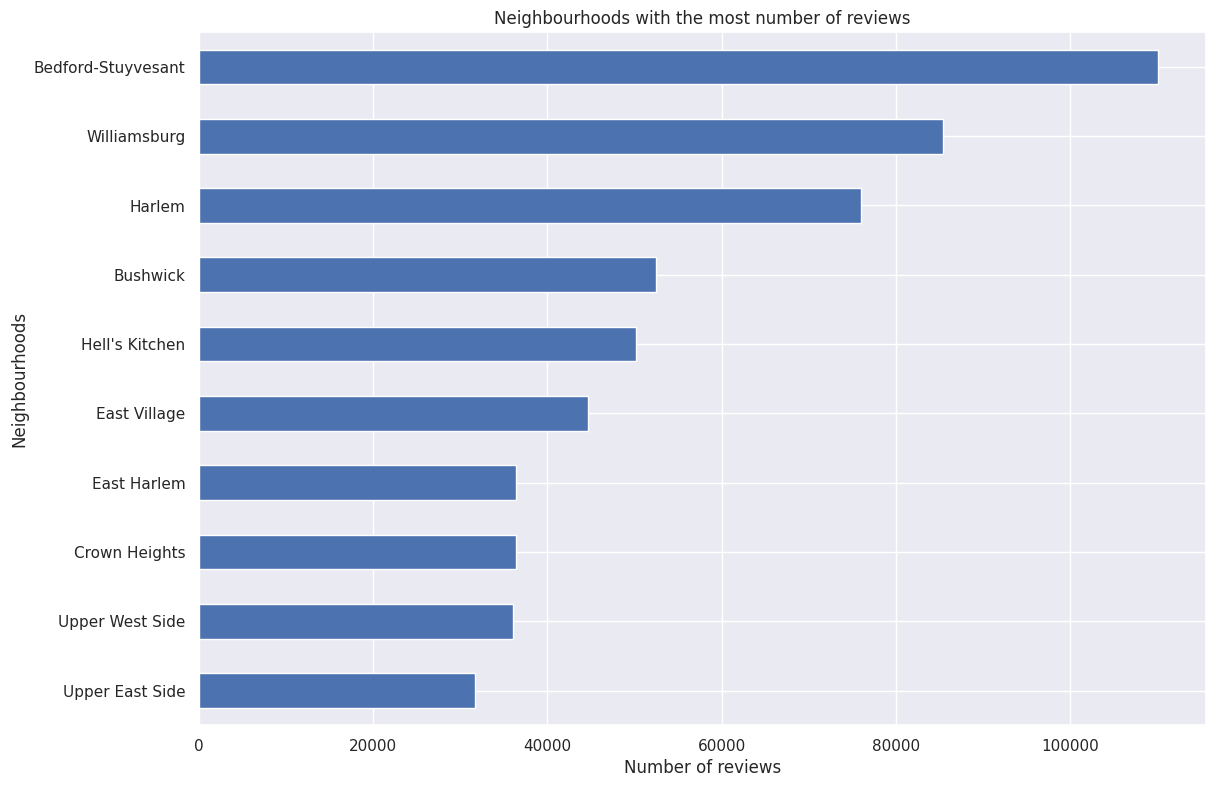

In [ ]:
# top 10 neighbourhoods on the basis of number of reviews
top_reviews_neighbourhood = df.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]
print('The neighbourhoods with the most number of reviews: \n',top_reviews_neighbourhood)
print('\n')

# plot the neighbourhood on the basis of number of reviews
top_reviews_neighbourhood.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Number of reviews')
plt.title('Neighbourhoods with the most number of reviews')
plt.show()

* Bedford-Stuyvesant and Williamsburg in Brooklyn is the neighbourhood with the most number of reviews.

* This shows that Brooklyn in general receives more number of tourists than other neighbourhood groups and could be the busiest neighbourhood group.
* Interestingly, these two neighbourhoods are very close to Manhattan and that could be a reason for getting a huge number of reviews which means a huge number of customers.

### **Which neighbourhoods are the most available or less occupied?**

The neighbourhoods which are the most available: 
 neighbourhood
Fort Wadsworth    365.000000
Co-op City        364.000000
Willowbrook       351.000000
Eastchester       333.461538
Richmondtown      300.000000
Mill Basin        290.000000
Edgemere          275.272727
Randall Manor     275.210526
West Brighton     274.722222
Spuyten Duyvil    270.000000
Name: availability_365, dtype: float64




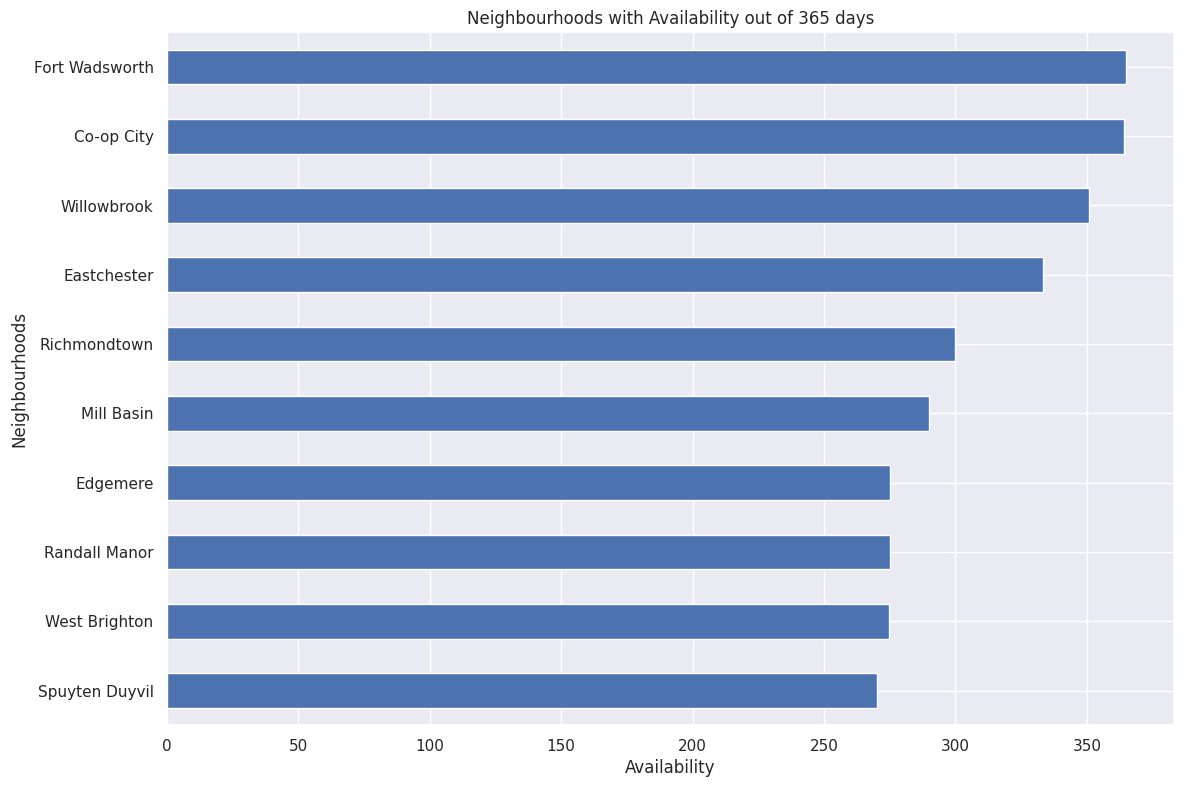

In [ ]:
# top neighbourhoods on the basis of availability
top_available_neighborhood = df.groupby(['neighbourhood'])['availability_365'].mean().sort_values(ascending=False)[:10]
print('The neighbourhoods which are the most available: \n',top_available_neighborhood)
print('\n')

top_available_neighborhood.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Availability')
plt.title('Neighbourhoods with Availability out of 365 days')
plt.show()

* Fort Wadsworth is the neighbourhood with the most available properties out of 365 days.
* This could be due to the high costs in the Fort Wadsworth neighbourhood.

## **<u>Let us find some insights about the Room Types available in NYC:</u>**

### **How many room types are available in NYC?**

The number of room types available with its count: 
 Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64




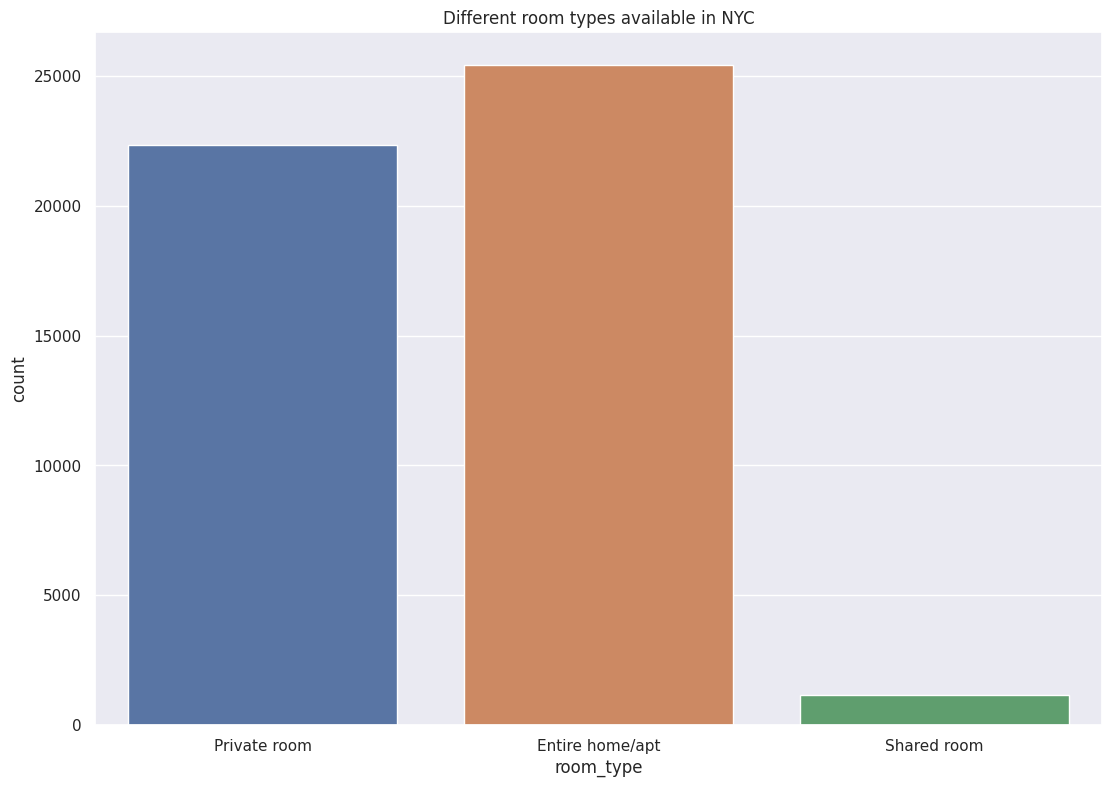

In [ ]:
# room types available on the basis of count of properties
room_types = df['room_type'].value_counts()
print('The number of room types available with its count: \n',room_types)
print('\n')

# plot the room types with the count of properties
plt.title('Different room types available in NYC')
sns.countplot(x =df['room_type'])
plt.show()

* Entire Home/Apt is most available room type in the property listings followed by Private Rooms.
* There are a very few shared rooms available as we have seen earlier.

### **Which room type is the most expensive and the most affordable one?**

The costs of different room types: 
 room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64




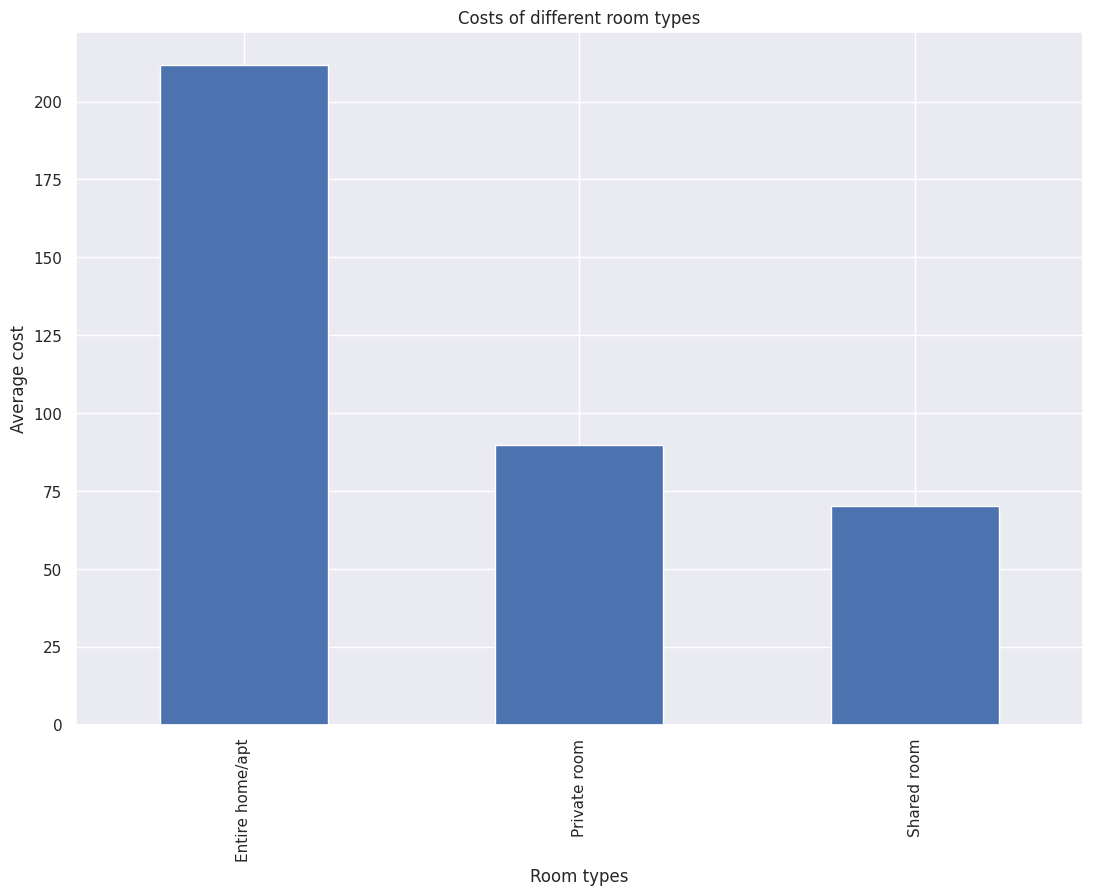

In [ ]:
# top expensive and affordable room types
room_costs = df.groupby(['room_type'])['price'].mean().sort_values(ascending=False)
print('The costs of different room types: \n',room_costs)
print('\n')

# plot the costs of different room types
room_costs.plot.bar()
plt.title('Costs of different room types')
plt.xlabel('Room types')
plt.ylabel('Average cost')
plt.show()

* As obvious Entire Home/Apt category of rooms costs much more than a single private or shared room.

### **Which room type is preferred for longer stays?**

The room types preferred for longer stays: 
 room_type
Entire home/apt    8.507262
Shared room        6.434370
Private room       5.379004
Name: minimum_nights, dtype: float64




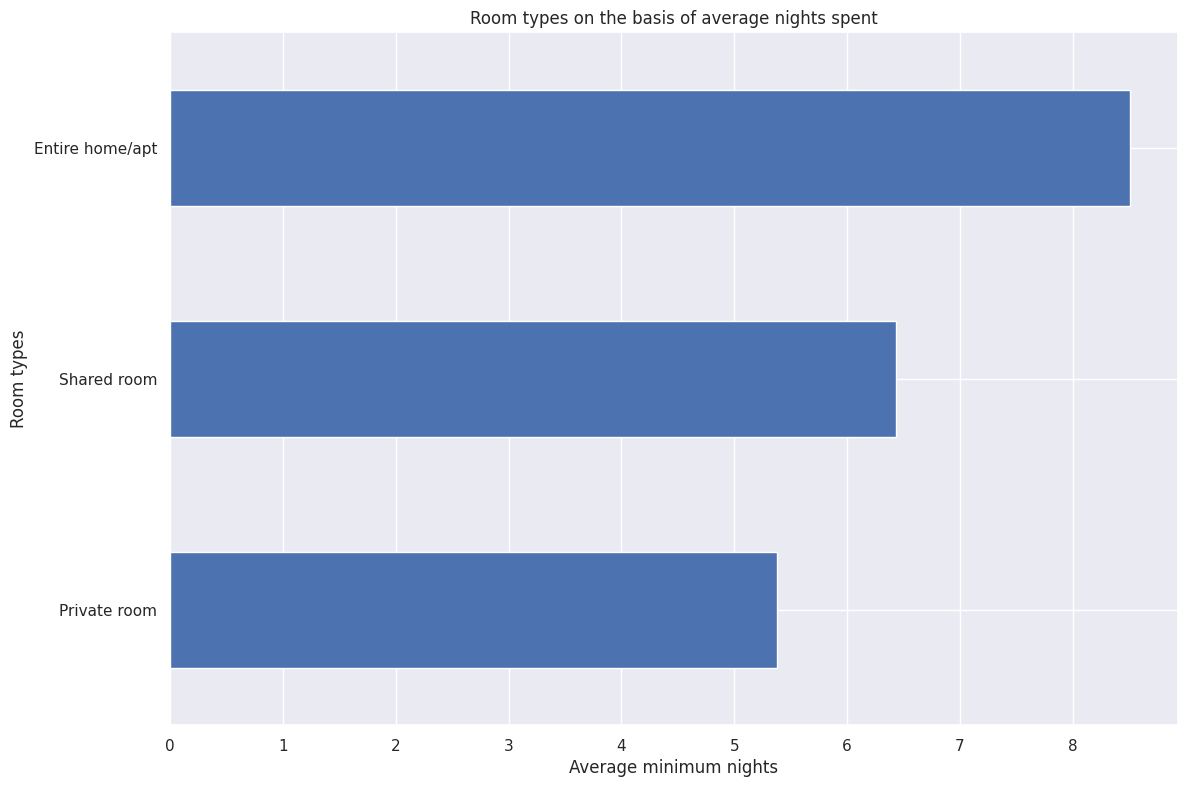

In [ ]:
# top room types on the basis of average min nights
long_stay_rooms = df.groupby(['room_type'])['minimum_nights'].mean().sort_values(ascending=False)
print('The room types preferred for longer stays: \n',long_stay_rooms)
print('\n')

# plot the room types where people most prefer to stay
long_stay_rooms.plot.barh().invert_yaxis()
plt.ylabel('Room types')
plt.xlabel('Average minimum nights')
plt.title('Room types on the basis of average nights spent')
plt.show()

* People prefer to book an Entire Home/Apt when they are in a long vacation. Generally long vacations means with family/friends and thus naturally they will need a bigger space for spending their nights in.

### **Which room type has got the most number of reviews?**

The room types with the most number of reviews: 
 room_type
Entire home/apt    580400
Private room       537979
Shared room         19249
Name: number_of_reviews, dtype: int64




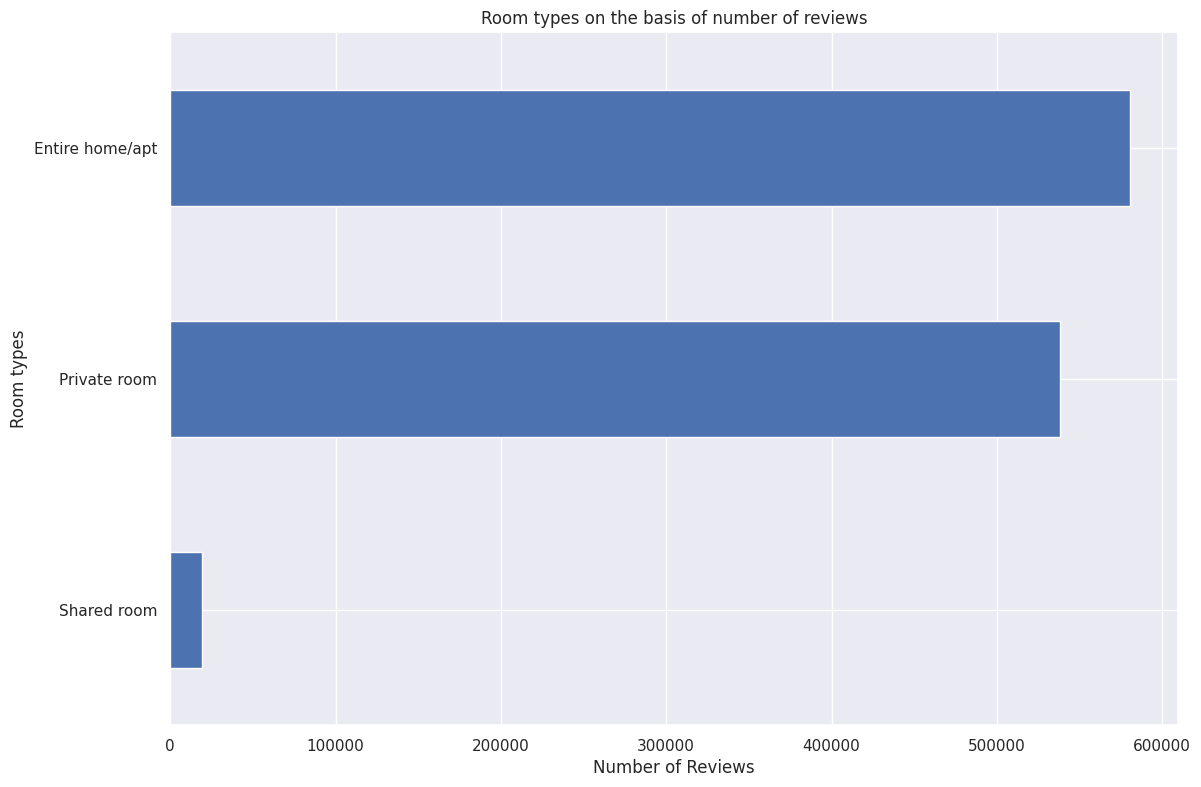

In [ ]:
# top room types according to the no. of reviews
top_review_rooms = df.groupby(['room_type'])['number_of_reviews'].sum().sort_values(ascending=False)
print('The room types with the most number of reviews: \n',top_review_rooms)
print('\n')

# plot the top room types with the number of reviews
top_review_rooms.plot.barh().invert_yaxis()
plt.ylabel('Room types')
plt.xlabel('Number of Reviews')
plt.title('Room types on the basis of number of reviews')
plt.show()

* Entire Homes/Apt has received the most number of reviews followed by Private Rooms which means more number of people are staying in these two room types than Shared rooms.
* Shared rooms are the least preferred for staying in.

* There is a significant difference in number of customers choosing Entire Homes or Private Rooms than Shared Rooms.

### **Which room type is more available or less occupied out of 365 days?**

Average availability of the different room types: 
 room_type
Shared room        161.873057
Entire home/apt    111.926241
Private room       111.203638
Name: availability_365, dtype: float64




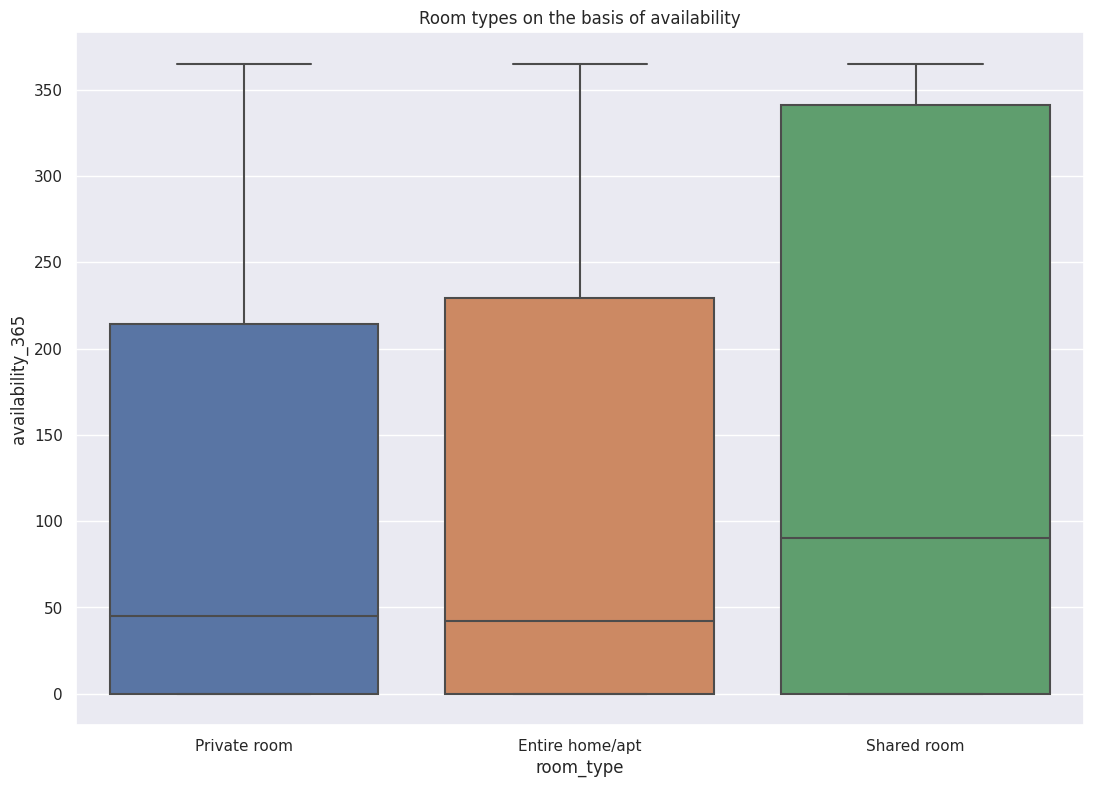

In [ ]:
# availability of room types
available_rooms = df.groupby(['room_type'])['availability_365'].mean().sort_values(ascending=False)
print('Average availability of the different room types: \n',available_rooms)
print('\n')

# room types on the basis of availability
plt.figure()
plt.title('Room types on the basis of availability')
sns.boxplot(data=df, x='room_type', y='availability_365')
plt.show()

Text(0.5, 1.0, 'Room types on the basis of availability')

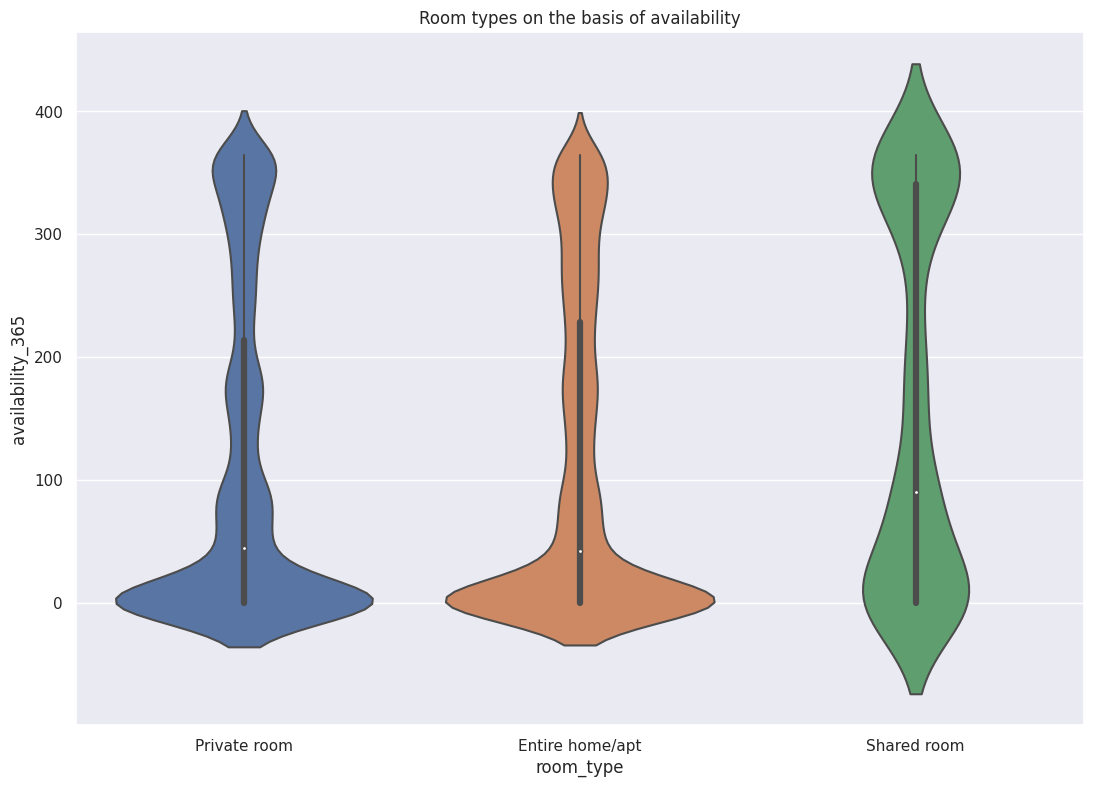

In [ ]:
# visualizing the availability of room types using a violin plot
sns.violinplot(x='room_type', y='availability_365', data=df)
plt.title('Room types on the basis of availability')

* As usual, shared rooms are the most available as very less number of customers prefer staying in shared rooms. People booking shared rooms might have different purpose of visiting the place other than a vacation.
* The plot above even proves that Private rooms and Entire Homes are the most preferred room type for any customer.

* The violin plot shows that most of the rooms in Private room and Entire home category are available for a low number of days like 0-50 days. Most of the values lie near the minimum for these two room categories.
* Shared rooms has properties which are available for 0-100 days and 300-365 days even. Thus on an average shared rooms are the most available out of 365 days.

# **<u>Conclusion:</u>**

#### We have reached the end of our analysis of Airbnb listings in NYC. We have explored, visualized most of the features and uncovered a lot of insights which will definitely assist the company in decision making to attract more tourists or customers. These insights will help the customers, hosts and the company to optimize their offerings to earn a win-win situation for every party.

#### Let us now summarize the insights we found in this notebook and answer all the questions given in the notebook more precisely.


#### **Insights we got about the different hosts:**

  * There are 37455 unique Airbnb hosts in New York City.

  * There are many hosts with multiple property listings in Airbnb NYC. Sonder (NYC) is the topmost host with the most number of property listings (327). Despite having the most number of properties she isn't the one receiving the most number of customers. In short she isn't the busiest host of all.

  * Host Maya who receives the most number of reviews is the one receiving the most number of customers (2273). She has 5 properties listed in the same neighbourhood. Thus, **Maya is the busiest host in NYC** and there could be multipe reasons for it like lower prices than other neighbourhoods, less number of minimum nights, good number of availability and a healthy number of reviews per month for each of her property.

  * There are many hosts who don't get a huge number of customers but are occupied for the whole year. Thus we can infer that whatever the number of customers they are getting are staying for a longer duration keeping their properties occupied all around the year.



---




#### **Insights we got about the different areas:**

  * Manhattan has the most number of properties listed (21660) followed by Brooklyn (20095). Staten Island has the least number of properties listed (373) and receives the least number of customers even. Most of the area in Staten Island are residential areas and hence very less number of Airbnbs are present.

  * Manhattan is the most expensive neighbourhood followed by Brooklyn and these two being the most popular areas for tourist attractions receives a huge traffic as compared to other neighbourhoods. **There is a significant difference in traffic in these two areas from the other neighbourhood groups.**

  * The average price for Private Rooms in Staten Island is the least and has a good availability out of 365 days which makes a good choice for customers seeking low cost accommodations.

  * Manhattan contains the most number of Entire Homes/Apt and in general these are costlier than any other room types across all the neighbourhood groups. Brooklyn too falls on the expensive side as Manhattan but has the least price per day for Shared Rooms.

  * Manhattan receives a good amount of customers and along with it these customers prefer to spend a longer duration in Manhattan than any other neighbourhood groups.

  * Bronx is the least expensive neighbourhood and very less preferred by customers.


---




#### **Insights we got about the different room types:**

  * There are 25407 Entire Home/Apt and 22319 Private Rooms which are way higher than the number of Shared Rooms available in NYC.

  * As we would guess, the Entire Home/Apt is the most expensive room category out of the three and is the most preferred room category for spending longer durations.

  * There is a significant difference in customers choosing Entire Home/Apt or Private Rooms than Shared Rooms.

  * Shared Rooms is the least preferred and remains the most available room category in NYC out of 365 days.

  * Entire Home/Apt and Private Rooms are the most preferred room categories for most of the customers despite being costly.



---

# **THE END**